##**Comprehensive Exam**
# 1-1 Import data


Build a model for the dataset scooter.csv that will predict the number users for a scooter rental service (user). \\
1. Justify your choice regarding the method chosen to create the model and explain the pros and cons in comparison with other state-of-the-art methods. \\
2. Quantify the prediction accuracy of your model and provide a detailed description of the methodology used for this task. \\
3. Provide a comprehensive list of the limitations of your model and explain how these could potentially be resolve using existing methods.

- season : 1:springer	 2:summer	 3:fall	 4:winter \\
- year : 0= 2011 ,	 1=2012	 \\
- month : month ( 1 to 12)
- hour : 0 to 23 \\
- holiday : (0	1)
- weekday : (1	7)
- workingday : (0	1)
- weather : 1= Clear	 2= Mist	 3=: Light Snow	 4= Heavy Rain
- temperature : temperature in Celsius divided by 41

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 6.1 MB/s eta 0:00:00


In [ ]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

import random
#from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.feature_selection import SelectFromModel

In [ ]:
#load the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv(r'/content/drive/MyDrive/scooter.csv')


In [ ]:
df

Date  season  year  month  Hour  holiday  weekday  workingday  \
0             NaN     NaN   NaN    NaN   NaN      NaN      NaN         NaN   
1      2011-01-01     1.0   0.0    1.0   0.0      0.0      6.0         0.0   
2             NaN     NaN   NaN    NaN   NaN      NaN      NaN         NaN   
3      2011-01-01     1.0   0.0    1.0   1.0      0.0      6.0         0.0   
4             NaN     NaN   NaN    NaN   NaN      NaN      NaN         NaN   
...           ...     ...   ...    ...   ...      ...      ...         ...   
34753  2012-12-31     1.0   1.0   12.0  21.0      0.0      1.0         1.0   
34754         NaN     NaN   NaN    NaN   NaN      NaN      NaN         NaN   
34755  2012-12-31     1.0   1.0   12.0  22.0      0.0      1.0         1.0   
34756         NaN     NaN   NaN    NaN   NaN      NaN      NaN         NaN   
34757  2012-12-31     1.0   1.0   12.0  23.0      0.0      1.0         1.0   

       weather  temperature  temperature felt  humidity  windspeed  users  
0          NaN          NaN               NaN       NaN        NaN    NaN  
1          1.0         0.24            0.2879      0.81     0.0000   16.0  
2          NaN          NaN               NaN       NaN        NaN    NaN  
3          1.0         0.22            0.2727      0.80     0.0000   40.0  
4          NaN          NaN               NaN       NaN        NaN    NaN  
...        ...          ...               ...       ...        ...    ...  
34753      1.0         0.26            0.2576      0.60     0.1642   90.0  
34754      NaN          NaN               NaN       NaN        NaN    NaN  
34755      1.0         0.26            0.2727      0.56     0.1343   61.0  
34756      NaN          NaN               NaN       NaN        NaN    NaN  
34757      1.0         0.26            0.2727      0.65     0.1343   49.0  

[34758 rows x 14 columns]

In [ ]:
df.columns = ["Date","season","year", "month",
              "Hour", "holiday", "weekday", "workingday" ,"weather" ,
              "temperature" ,"temperature felt", "humidity", "windspeed" ,"users"
]

In [ ]:
df.head(20)

Date  season  year  month  Hour  holiday  weekday  workingday  \
0          NaN     NaN   NaN    NaN   NaN      NaN      NaN         NaN   
1   2011-01-01     1.0   0.0    1.0   0.0      0.0      6.0         0.0   
2          NaN     NaN   NaN    NaN   NaN      NaN      NaN         NaN   
3   2011-01-01     1.0   0.0    1.0   1.0      0.0      6.0         0.0   
4          NaN     NaN   NaN    NaN   NaN      NaN      NaN         NaN   
5   2011-01-01     1.0   0.0    1.0   2.0      0.0      6.0         0.0   
6          NaN     NaN   NaN    NaN   NaN      NaN      NaN         NaN   
7   2011-01-01     1.0   0.0    1.0   3.0      0.0      6.0         0.0   
8          NaN     NaN   NaN    NaN   NaN      NaN      NaN         NaN   
9   2011-01-01     1.0   0.0    1.0   4.0      0.0      6.0         0.0   
10         NaN     NaN   NaN    NaN   NaN      NaN      NaN         NaN   
11  2011-01-01     1.0   0.0    1.0   5.0      0.0      6.0         0.0   
12         NaN     NaN   NaN    NaN   NaN      NaN      NaN         NaN   
13  2011-01-01     1.0   0.0    1.0   6.0      0.0      6.0         0.0   
14         NaN     NaN   NaN    NaN   NaN      NaN      NaN         NaN   
15  2011-01-01     1.0   0.0    1.0   7.0      0.0      6.0         0.0   
16         NaN     NaN   NaN    NaN   NaN      NaN      NaN         NaN   
17  2011-01-01     1.0   0.0    1.0   8.0      0.0      6.0         0.0   
18         NaN     NaN   NaN    NaN   NaN      NaN      NaN         NaN   
19  2011-01-01     1.0   0.0    1.0   9.0      0.0      6.0         0.0   

    weather  temperature  temperature felt  humidity  windspeed  users  
0       NaN          NaN               NaN       NaN        NaN    NaN  
1       1.0         0.24            0.2879      0.81     0.0000   16.0  
2       NaN          NaN               NaN       NaN        NaN    NaN  
3       1.0         0.22            0.2727      0.80     0.0000   40.0  
4       NaN          NaN               NaN       NaN        NaN    NaN  
5       1.0         0.22            0.2727      0.80     0.0000   32.0  
6       NaN          NaN               NaN       NaN        NaN    NaN  
7       1.0         0.24            0.2879      0.75     0.0000   13.0  
8       NaN          NaN               NaN       NaN        NaN    NaN  
9       1.0         0.24            0.2879      0.75     0.0000    1.0  
10      NaN          NaN               NaN       NaN        NaN    NaN  
11      2.0         0.24            0.2576      0.75     0.0896    1.0  
12      NaN          NaN               NaN       NaN        NaN    NaN  
13      1.0         0.22            0.2727      0.80     0.0000    2.0  
14      NaN          NaN               NaN       NaN        NaN    NaN  
15      1.0         0.20            0.2576      0.86     0.0000    3.0  
16      NaN          NaN               NaN       NaN        NaN    NaN  
17      1.0         0.24            0.2879      0.75     0.0000    8.0  
18      NaN          NaN               NaN       NaN        NaN    NaN  
19      1.0         0.32            0.3485      0.76     0.0000   14.0

In [ ]:
#removing nan data
df= df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 34757
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              17379 non-null  object 
 1   season            17379 non-null  float64
 2   year              17379 non-null  float64
 3   month             17379 non-null  float64
 4   Hour              17379 non-null  float64
 5   holiday           17379 non-null  float64
 6   weekday           17379 non-null  float64
 7   workingday        17379 non-null  float64
 8   weather           17379 non-null  float64
 9   temperature       17379 non-null  float64
 10  temperature felt  17379 non-null  float64
 11  humidity          17379 non-null  float64
 12  windspeed         17379 non-null  float64
 13  users             17379 non-null  float64
dtypes: float64(13), object(1)
memory usage: 2.0+ MB


In [ ]:
df.shape

(17379, 14)

In [ ]:
df.isna().sum()


Date                0
season              0
year                0
month               0
Hour                0
holiday             0
weekday             0
workingday          0
weather             0
temperature         0
temperature felt    0
humidity            0
windspeed           0
users               0
dtype: int64

In [ ]:
df.head(10)

Date  season  year  month  Hour  holiday  weekday  workingday  \
1   2011-01-01     1.0   0.0    1.0   0.0      0.0      6.0         0.0   
3   2011-01-01     1.0   0.0    1.0   1.0      0.0      6.0         0.0   
5   2011-01-01     1.0   0.0    1.0   2.0      0.0      6.0         0.0   
7   2011-01-01     1.0   0.0    1.0   3.0      0.0      6.0         0.0   
9   2011-01-01     1.0   0.0    1.0   4.0      0.0      6.0         0.0   
11  2011-01-01     1.0   0.0    1.0   5.0      0.0      6.0         0.0   
13  2011-01-01     1.0   0.0    1.0   6.0      0.0      6.0         0.0   
15  2011-01-01     1.0   0.0    1.0   7.0      0.0      6.0         0.0   
17  2011-01-01     1.0   0.0    1.0   8.0      0.0      6.0         0.0   
19  2011-01-01     1.0   0.0    1.0   9.0      0.0      6.0         0.0   

    weather  temperature  temperature felt  humidity  windspeed  users  
1       1.0         0.24            0.2879      0.81     0.0000   16.0  
3       1.0         0.22            0.2727      0.80     0.0000   40.0  
5       1.0         0.22            0.2727      0.80     0.0000   32.0  
7       1.0         0.24            0.2879      0.75     0.0000   13.0  
9       1.0         0.24            0.2879      0.75     0.0000    1.0  
11      2.0         0.24            0.2576      0.75     0.0896    1.0  
13      1.0         0.22            0.2727      0.80     0.0000    2.0  
15      1.0         0.20            0.2576      0.86     0.0000    3.0  
17      1.0         0.24            0.2879      0.75     0.0000    8.0  
19      1.0         0.32            0.3485      0.76     0.0000   14.0

# 1-2 Data overall statistics


In [ ]:
df.describe()

season          year         month          Hour       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775     11.546752      0.028770   
std        1.106918      0.500008      3.438776      6.914405      0.167165   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        2.000000      0.000000      4.000000      6.000000      0.000000   
50%        3.000000      1.000000      7.000000     12.000000      0.000000   
75%        3.000000      1.000000     10.000000     18.000000      0.000000   
max        4.000000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday       weather   temperature  \
count  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987   
std        2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      1.000000      0.020000   
25%        1.000000      0.000000      1.000000      0.340000   
50%        3.000000      1.000000      1.000000      0.500000   
75%        5.000000      1.000000      2.000000      0.660000   
max        6.000000      1.000000      4.000000      1.000000   

       temperature felt      humidity     windspeed         users  
count      17379.000000  17379.000000  17379.000000  17379.000000  
mean           0.475775      0.627229      0.190098    189.463088  
std            0.171850      0.192930      0.122340    181.387599  
min            0.000000      0.000000      0.000000      1.000000  
25%            0.333300      0.480000      0.104500     40.000000  
50%            0.484800      0.630000      0.194000    142.000000  
75%            0.621200      0.780000      0.253700    281.000000  
max            1.000000      1.000000      0.850700    977.000000

In [ ]:
for col in df.columns:
    print("{c} Column has {u} unique values".format(c=col,u = np.count_nonzero(df[col].unique())))

Date Column has 731 unique values
season Column has 4 unique values
year Column has 1 unique values
month Column has 12 unique values
Hour Column has 23 unique values
holiday Column has 1 unique values
weekday Column has 6 unique values
workingday Column has 1 unique values
weather Column has 4 unique values
temperature Column has 50 unique values
temperature felt Column has 64 unique values
humidity Column has 88 unique values
windspeed Column has 29 unique values
users Column has 869 unique values


In [ ]:
##Counting unique elements in user
np.count_nonzero(df['users'].unique())

869

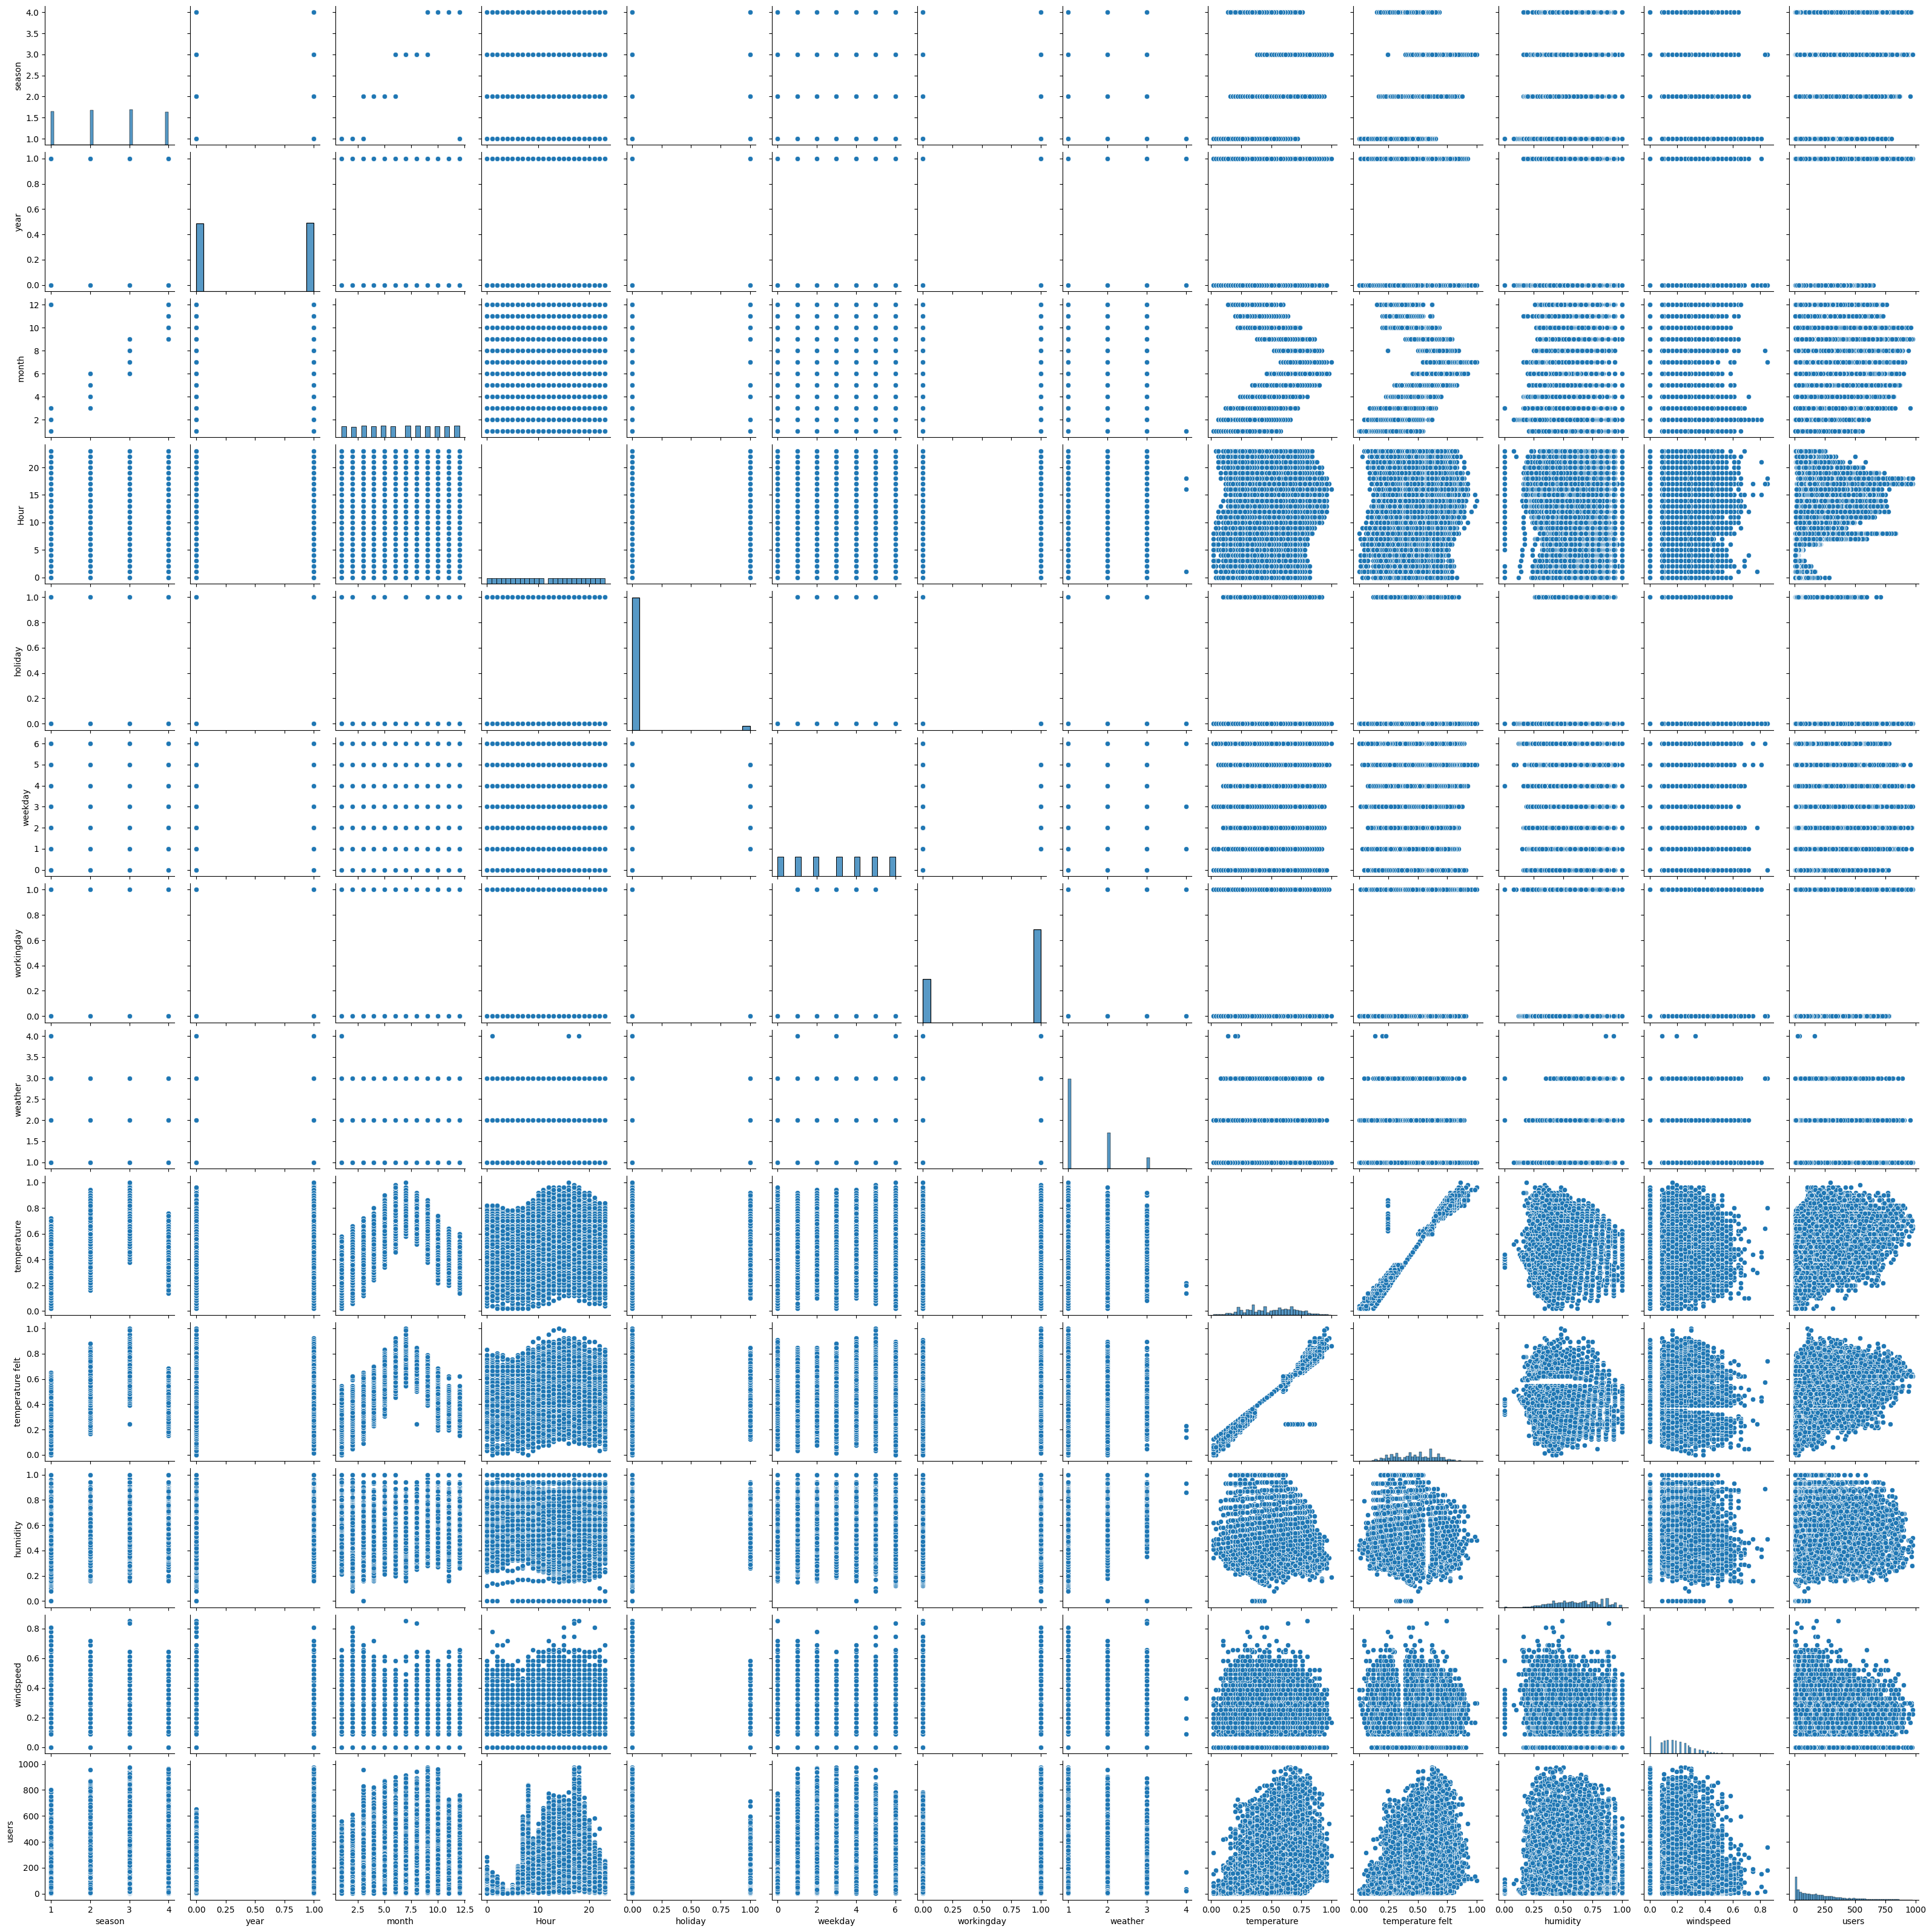

In [ ]:
sns.pairplot(df)

<ipython-input-50-4ce9f4926fe0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')


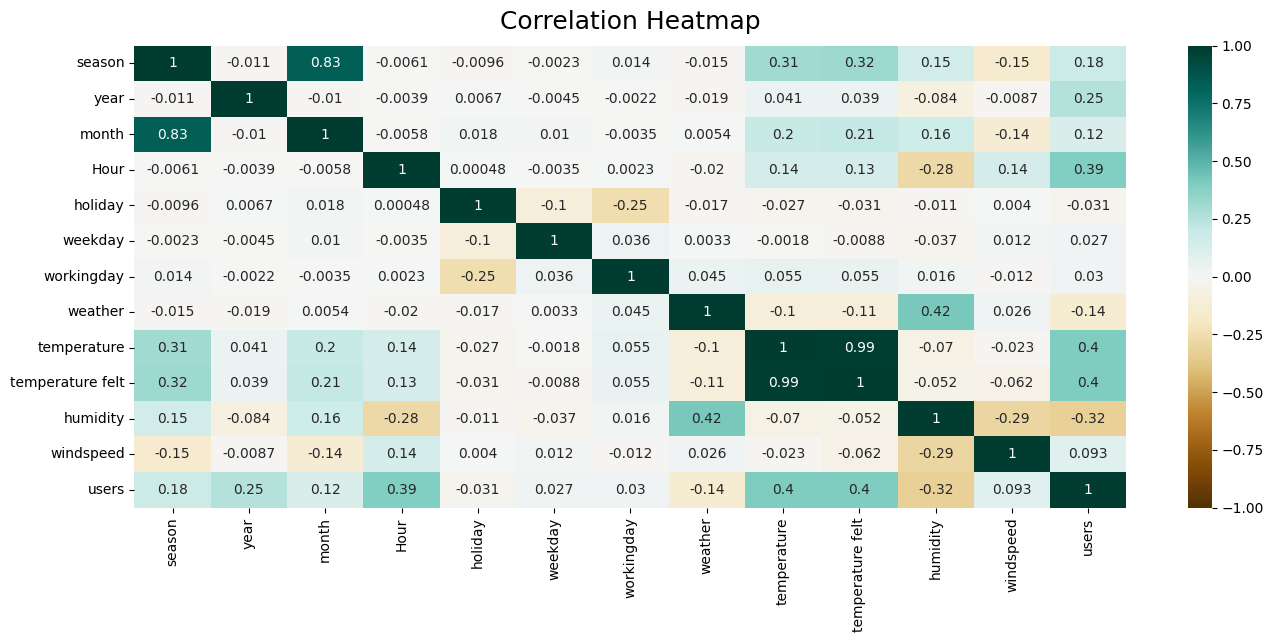

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

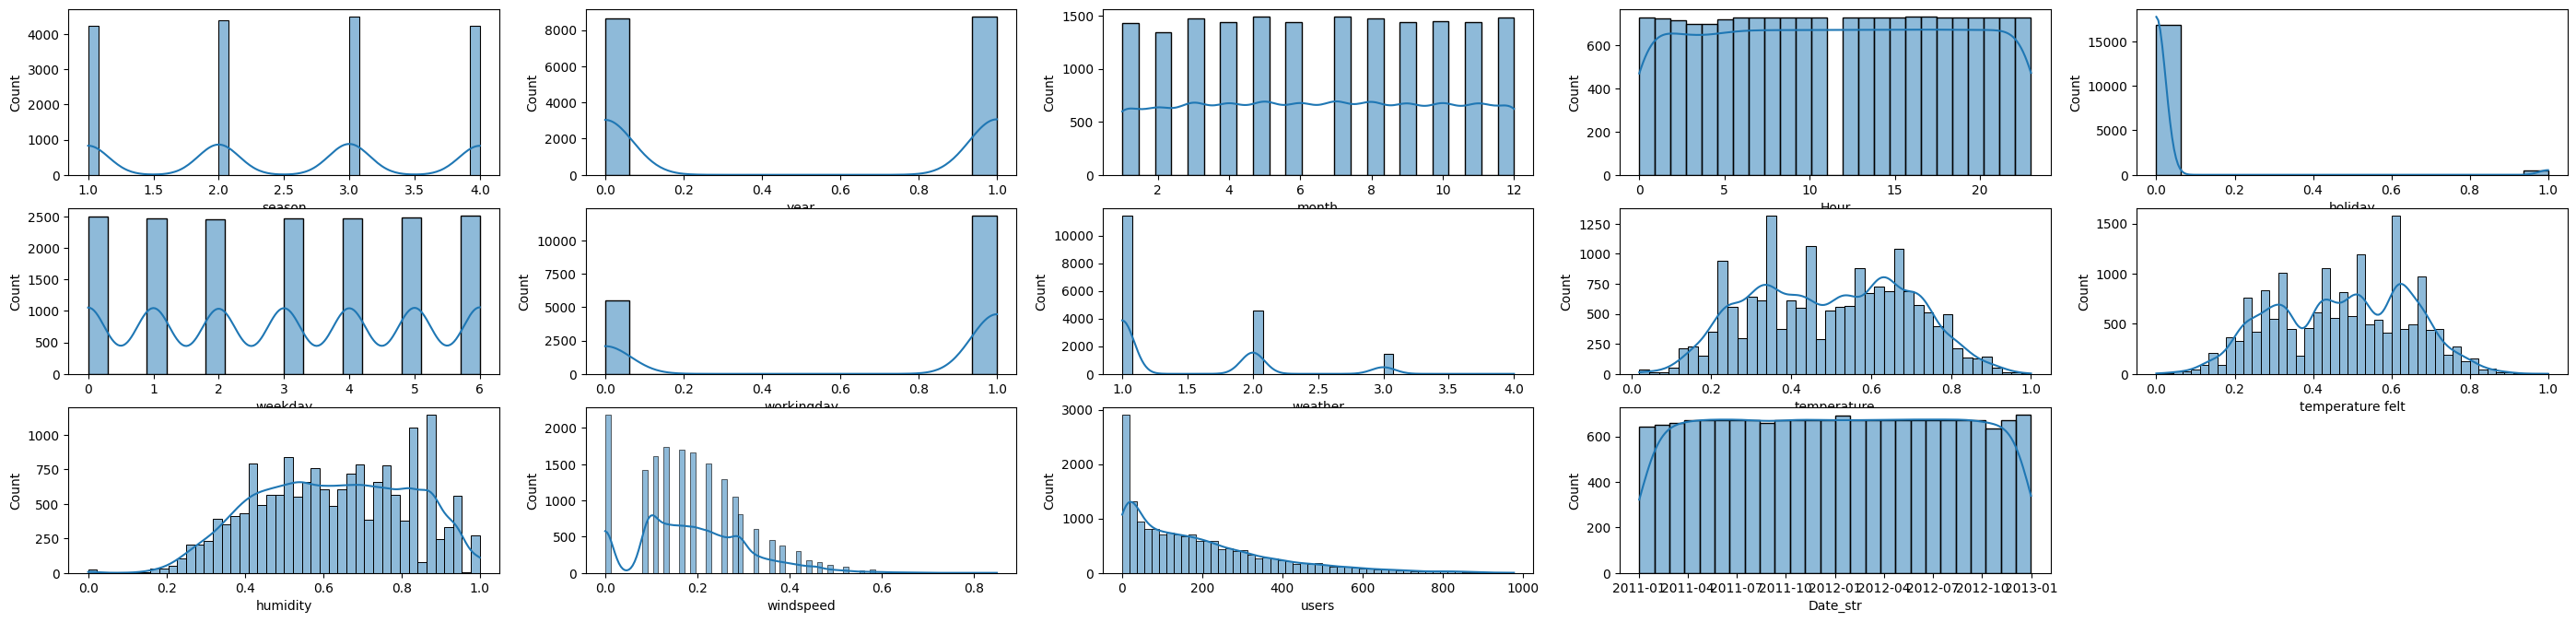

In [ ]:
plt.figure(figsize=(35,36))

l = df.columns.values
number_of_columns=5
number_of_rows = int(len(l)-1/number_of_columns)
for i in range(0,len(l)):
    plt.subplot(number_of_rows ,number_of_columns,i+1)
    sns.histplot(df[l[i]],kde=True)
plt.show()

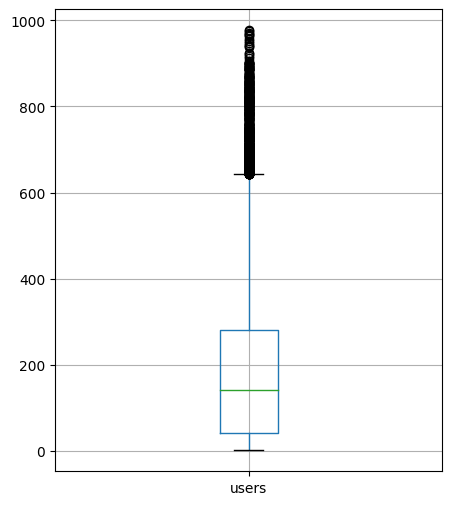

In [ ]:
plt.figure(figsize=(5,6))

boxplot = df.boxplot(column= ["users"
] )
boxplot.plot()
plt.show()


<Axes: xlabel='users', ylabel='Count'>

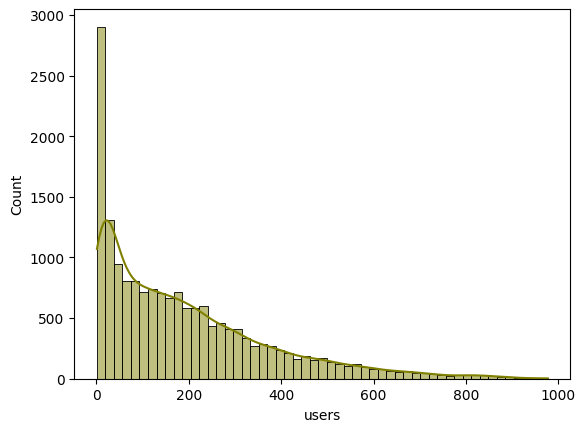

In [ ]:
sns.histplot(data=df, x="users", kde=True, color= 'olive')


#1-3 Data Cleaning and model fitting


From information provided from feature selectiona and corrolation matrix we should only consider one of following varibles temperature and temperature felt (high correlation 0.99). In this case we only consider temperature fel. Also, season and month have high correlation we need to consider only one of these features so we only consider month as variable.

*  We can conclude that there are no outliers because there is no significant difference between the 75th quantile and the maximum value for any of the features.


*   The range of values of the features is not the same for that we choose to normalize the date in order to make it in the same scale.



In [ ]:
df= df.drop(columns=['season','temperature'])

In [ ]:
df= df.drop(columns=['Date'])

In [ ]:
df['Date'] = df['Date'].astype('datetime64')
df['holiday']=df['holiday'].astype('category')
df['month']=df['month'].astype('category')
df['weekday']=df['weekday'].astype('category')
df['Hour']=df['Hour'].astype('category')
df['year']=df['year'].astype('category')
df['workingday']=df['workingday'].astype('category')
df['weather']=df['weather'].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 34757
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              17379 non-null  datetime64[ns]
 1   year              17379 non-null  category      
 2   month             17379 non-null  category      
 3   Hour              17379 non-null  category      
 4   holiday           17379 non-null  category      
 5   weekday           17379 non-null  category      
 6   workingday        17379 non-null  category      
 7   weather           17379 non-null  category      
 8   temperature felt  17379 non-null  float64       
 9   humidity          17379 non-null  float64       
 10  windspeed         17379 non-null  float64       
 11  users             17379 non-null  float64       
dtypes: category(7), datetime64[ns](1), float64(4)
memory usage: 935.5 KB


In [ ]:
pd.crosstab(df.weather, df.season)


season    1.0   2.0   3.0   4.0
weather                        
1.0      2665  2859  3280  2609
2.0      1205  1144   947  1248
3.0       369   406   269   375
4.0         3     0     0     0

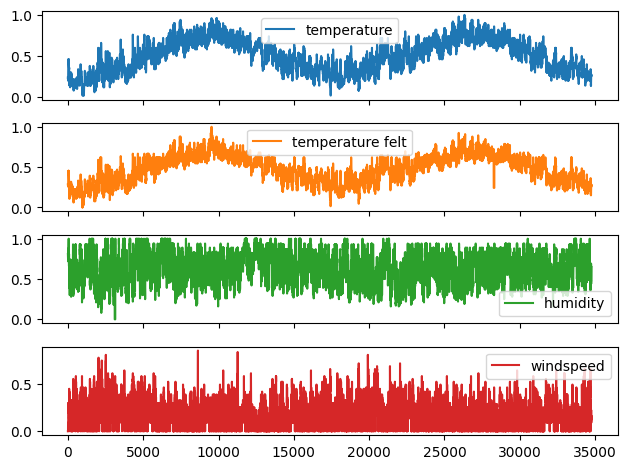

In [ ]:
df.loc[:,'temperature':'windspeed'].plot(subplots=True)
plt.xlabel("")
plt.tight_layout()
plt.show()

**Feature selection**

In [ ]:
from sklearn.feature_selection import SelectKBest,  f_regression

We started by selecting 7 features at the beginning by dropping temperature and season. however, it yielded bad performance. Highest performance features are "temperature felt" and "Hour". Therefore, we opted to drop another feature with a low correlation with the target variables which is windspeed. We add windspeed the performance is getting better. Finally from feature selection 'weekday' and  'workingday' are remove due low performance.

In [ ]:
X=df.iloc[:,0:10]
Y=df.iloc[:,-1]

In [ ]:
print(X)

      year month  Hour holiday weekday workingday weather  temperature felt  \
1      0.0   1.0   0.0     0.0     6.0        0.0     1.0            0.2879   
3      0.0   1.0   1.0     0.0     6.0        0.0     1.0            0.2727   
5      0.0   1.0   2.0     0.0     6.0        0.0     1.0            0.2727   
7      0.0   1.0   3.0     0.0     6.0        0.0     1.0            0.2879   
9      0.0   1.0   4.0     0.0     6.0        0.0     1.0            0.2879   
...    ...   ...   ...     ...     ...        ...     ...               ...   
34749  1.0  12.0  19.0     0.0     1.0        1.0     2.0            0.2576   
34751  1.0  12.0  20.0     0.0     1.0        1.0     2.0            0.2576   
34753  1.0  12.0  21.0     0.0     1.0        1.0     1.0            0.2576   
34755  1.0  12.0  22.0     0.0     1.0        1.0     1.0            0.2727   
34757  1.0  12.0  23.0     0.0     1.0        1.0     1.0            0.2727   

       humidity  windspeed  
1          0.81     0.

In [ ]:
print(Y)

1         16.0
3         40.0
5         32.0
7         13.0
9          1.0
         ...  
34749    119.0
34751     89.0
34753     90.0
34755     61.0
34757     49.0
Name: users, Length: 17379, dtype: float64


In [ ]:
select = SelectKBest(score_func=f_regression,k=8)
z = select.fit_transform(X,Y)

cols_idxs = select.get_support(indices=True)

In [ ]:
features = X.iloc[:,cols_idxs]
features.columns

Index(['year', 'month', 'Hour', 'holiday', 'weather', 'temperature felt',
       'humidity', 'windspeed'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(df)
scaled = scaler.transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)

print(scaled_df)


       year     month      Hour  holiday   weekday  workingday  weather  \
0       0.0  0.083333  0.000000      0.0  1.000000         0.0     0.25   
1       0.0  0.083333  0.043478      0.0  1.000000         0.0     0.25   
2       0.0  0.083333  0.086957      0.0  1.000000         0.0     0.25   
3       0.0  0.083333  0.130435      0.0  1.000000         0.0     0.25   
4       0.0  0.083333  0.173913      0.0  1.000000         0.0     0.25   
...     ...       ...       ...      ...       ...         ...      ...   
17374   1.0  1.000000  0.826087      0.0  0.166667         1.0     0.50   
17375   1.0  1.000000  0.869565      0.0  0.166667         1.0     0.50   
17376   1.0  1.000000  0.913043      0.0  0.166667         1.0     0.25   
17377   1.0  1.000000  0.956522      0.0  0.166667         1.0     0.25   
17378   1.0  1.000000  1.000000      0.0  0.166667         1.0     0.25   

       temperature felt  humidity  windspeed     users  
0                0.2879      0.81   0.0000

In [ ]:
df_new= scaled_df.drop(columns=['weekday' , 'workingday'] )

In [ ]:
df_new.describe()

year         month          Hour       holiday       weather  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.502561      0.544815      0.502033      0.028770      0.356321   
std        0.500008      0.286565      0.300626      0.167165      0.159839   
min        0.000000      0.083333      0.000000      0.000000      0.250000   
25%        0.000000      0.333333      0.260870      0.000000      0.250000   
50%        1.000000      0.583333      0.521739      0.000000      0.250000   
75%        1.000000      0.833333      0.782609      0.000000      0.500000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       temperature felt      humidity     windspeed         users  
count      17379.000000  17379.000000  17379.000000  17379.000000  
mean           0.475775      0.627229      0.223460      0.193923  
std            0.171850      0.192930      0.143811      0.185658  
min            0.000000      0.000000      0.000000      0.001024  
25%            0.333300      0.480000      0.122840      0.040942  
50%            0.484800      0.630000      0.228047      0.145343  
75%            0.621200      0.780000      0.298225      0.287615  
max            1.000000      1.000000      1.000000      1.000000

Change in user count over the time

[Text(0.5, 1.0, 'Count of scooter during weekdays and weekends')]

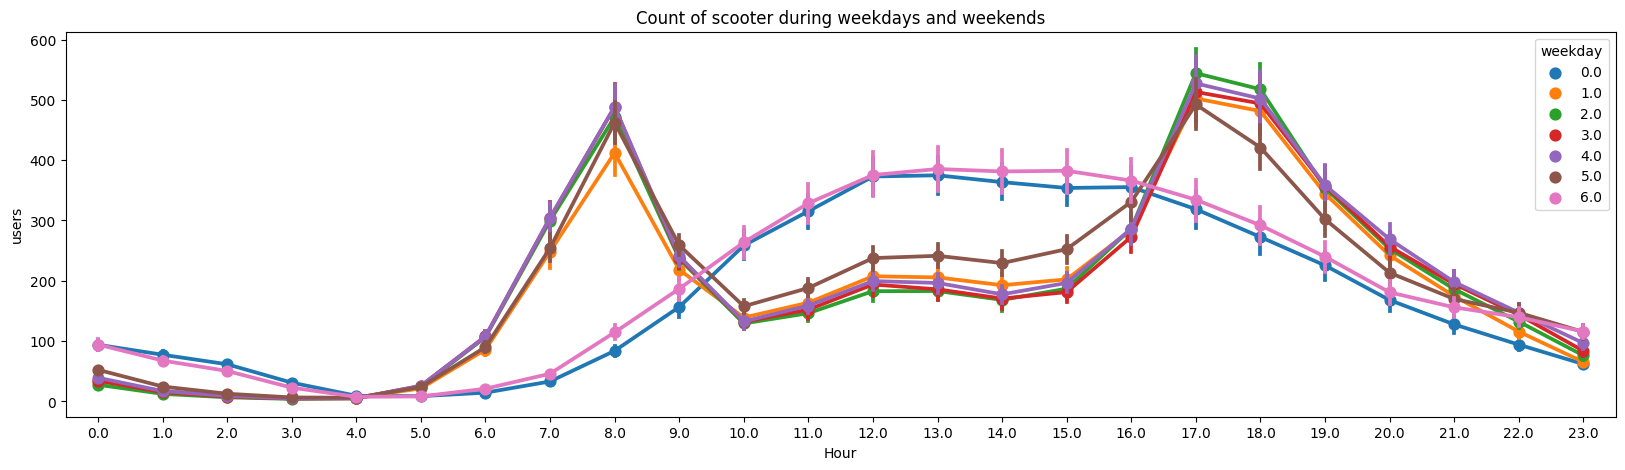

In [ ]:
fig, ax = plt.subplots(figsize = (20,5))
sns.pointplot(data = df , x ='Hour' , y ='users', hue = 'weekday')
ax.set(title='Count of scooter during weekdays and weekends')

[Text(0.5, 1.0, 'Count of scooter during different months')]

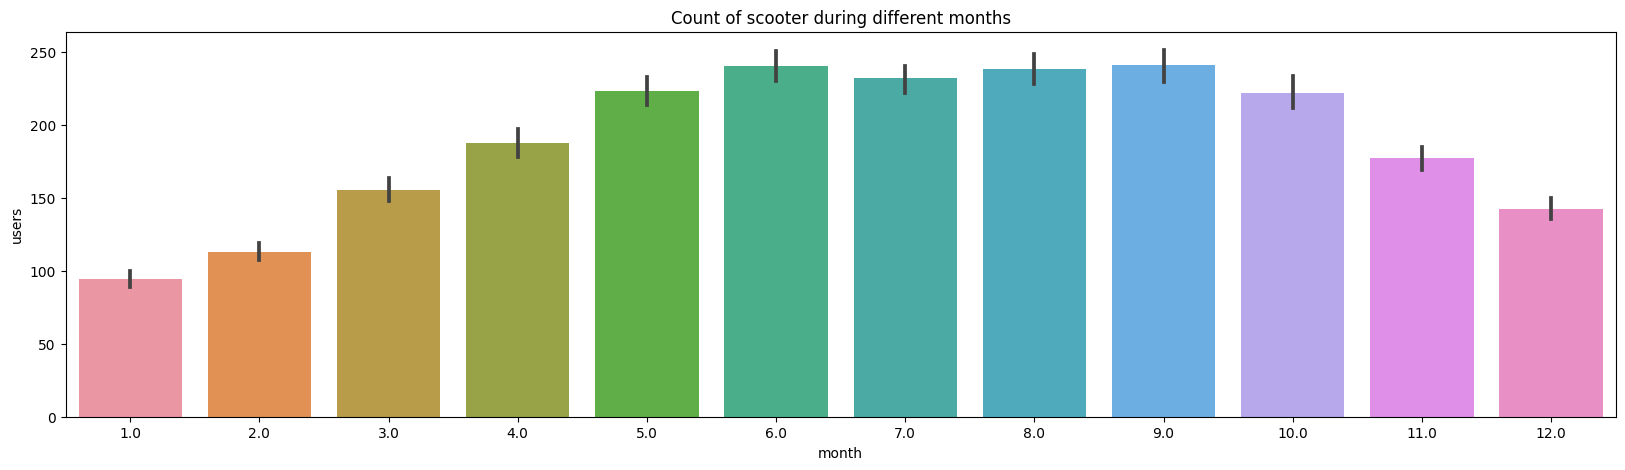

In [ ]:
fig ,ax = plt.subplots(figsize = (20,5))
sns.barplot(data = df , x= 'month', y = 'users')
ax.set(title='Count of scooter during different months')

[Text(0.5, 1.0, 'Count of scooter during different days')]

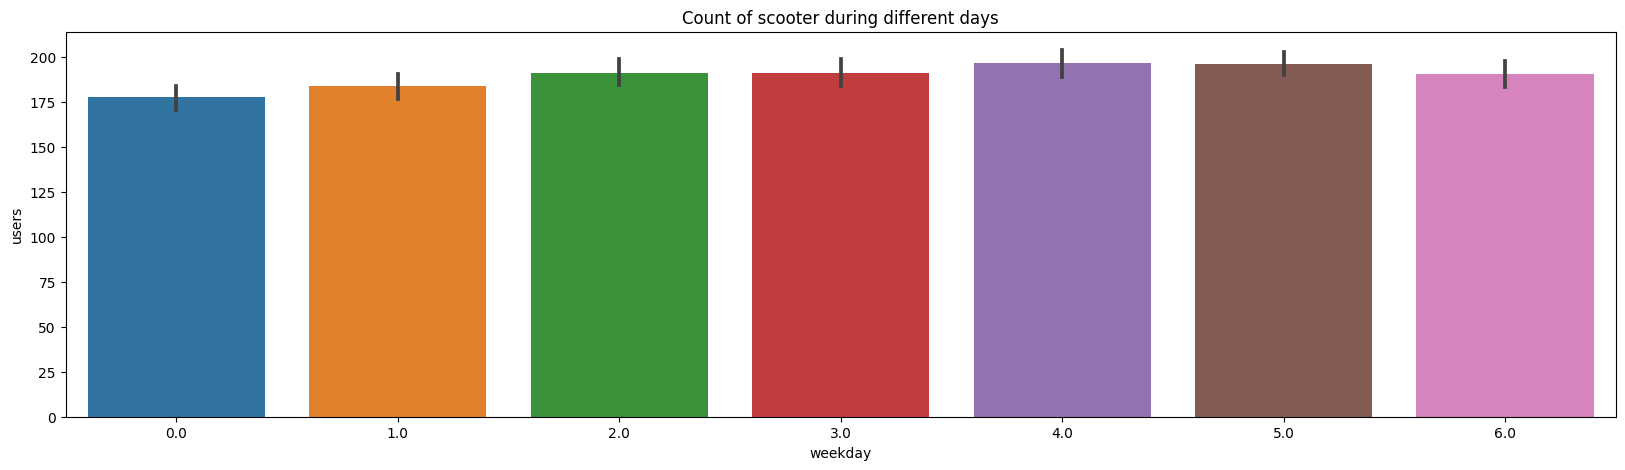

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=df, x='weekday', y='users')
ax.set(title='Count of scooter during different days')

**Spiliting dataset**

In [ ]:
X=df_new.iloc[:,0:8]
Y=df_new.iloc[:,8]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X,Y ,
                                   random_state=2,
                                   test_size=0.2,
                                   shuffle=True)

In [ ]:
x_train

year     month      Hour  holiday  weather  temperature felt  humidity  \
5841    0.0  0.750000  0.869565      1.0     0.75            0.5909      0.94   
3982    0.0  0.500000  0.869565      0.0     0.25            0.6515      0.70   
7943    0.0  1.000000  0.652174      0.0     0.25            0.4242      0.41   
15113   1.0  0.750000  0.956522      0.0     0.75            0.6061      0.69   
16342   1.0  0.916667  0.695652      0.0     0.50            0.4091      0.62   
...     ...       ...       ...      ...      ...               ...       ...   
14696   1.0  0.750000  0.565217      0.0     0.25            0.6364      0.39   
1099    0.0  0.166667  0.565217      0.0     0.25            0.6212      0.43   
11798   1.0  0.416667  0.826087      0.0     0.25            0.6061      0.23   
6637    0.0  0.833333  0.130435      0.0     0.25            0.4394      0.88   
2575    0.0  0.333333  0.217391      0.0     0.25            0.3182      0.53   

       windspeed  
5841    0.298225  
3982    0.228047  
7943    0.105325  
15113   0.228047  
16342   0.386035  
...          ...  
14696   0.000000  
1099    0.228047  
11798   0.298225  
6637    0.000000  
2575    0.263195  

[13903 rows x 8 columns]

In [ ]:
y_train

5841     0.083930
3982     0.237462
7943     0.203685
15113    0.220061
16342    0.380757
           ...   
14696    0.746162
1099     0.180143
11798    0.514841
6637     0.030706
2575     0.016377
Name: users, Length: 13903, dtype: float64

##**2-1 Machine learning Model**

**2-1-1 Linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
linear = lm.score(x_test, y_test)
print(f"coefficient of determination: {linear}")
print(f"intercept: {lm.intercept_}")
print(f"slope: {lm.coef_}")

coefficient of determination: 0.3751191918412766
intercept: -0.014430725994202392
slope: [ 0.08357801  0.06104616  0.17870015 -0.02965753 -0.01356301  0.34938814
 -0.19936361  0.03377672]


In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
6          humidity  10.93
5  temperature felt   7.59
4           weather   7.50
1             month   4.89
2              Hour   3.74
7         windspeed   3.11
0              year   1.92
3           holiday   1.03

**2-1-3 XGBoosted, CatBoosted and LGBMRegressor**
- In this section we employed three regressior from descion tree family with random search

In [ ]:
distributions = dict(learning_rate=uniform(), n_estimators=np.arange(10,500), max_depth=np.arange(1,50), min_data_in_leaf=np.arange(5,100))

t11 = time.time()

clf1 = RandomizedSearchCV(XGBRegressor(), distributions, cv=5, scoring='r2').fit(x_train ,y_train)


y_train_pred1 = clf1.predict(x_train)
y_test_pred1 = clf1.predict(x_test)
r2_train1 = r2_score(y_train_pred1, y_train)
r2_test1 = r2_score(y_test_pred1, y_test)
mae_train1 = mean_absolute_error(y_train_pred1, y_train)
mae_test1 = mean_absolute_error(y_test_pred1, y_test)
mse_train1 = mean_squared_error(y_train_pred1, y_train)
mse_test1 = mean_squared_error(y_test_pred1, y_test)
me_train1 = max_error(y_train_pred1, y_train)
me_test1 = max_error(y_test_pred1, y_test)

t1 = time.time() - t11

t12 = time.time()






clf2 = RandomizedSearchCV(LGBMRegressor(), distributions, cv=5, scoring='r2').fit(x_train ,y_train)


y_train_pred2 = clf2.predict(x_train)
y_test_pred2 = clf2.predict(x_test)
r2_train2 = r2_score(y_train_pred2, y_train)
r2_test2 = r2_score(y_test_pred2, y_test)
mae_train2 = mean_absolute_error(y_train_pred2, y_train)
mae_test2 = mean_absolute_error(y_test_pred2, y_test)
mse_train2 = mean_squared_error(y_train_pred2, y_train)
mse_test2 = mean_squared_error(y_test_pred2, y_test)
me_train2 = max_error(y_train_pred2, y_train)
me_test2 = max_error(y_test_pred2, y_test)

t2 = time.time() - t12

t13 = time.time()

clf3 = RandomizedSearchCV(CatBoostRegressor(), distributions, cv=5, scoring='r2').fit(x_train ,y_train)


y_train_pred3 = clf3.predict(x_train)
y_test_pred3 = clf3.predict(x_test)
r2_train3 = r2_score(y_train_pred3, y_train)
r2_test3 = r2_score(y_test_pred3, y_test)
mae_train3 = mean_absolute_error(y_train_pred3, y_train)
mae_test3 = mean_absolute_error(y_test_pred3, y_test)
mse_train3 = mean_squared_error(y_train_pred3, y_train)
mse_test3 = mean_squared_error(y_test_pred3, y_test)
me_train3 = max_error(y_train_pred3, y_train)
me_test3 = max_error(y_test_pred3, y_test)

t3 = time.time() - t13





score1 = clf1.best_score_
params1 = clf1.best_params_
print(score1)
print(params1)
print(r2_test1)
print(t1)

print("")
print("")

score2 = clf2.best_score_
params2 = clf2.best_params_
print(score2)
print(params2)
print(r2_test2)
print(t2)

print("")
print("")

score3 = clf3.best_score_
params3 = clf3.best_params_
print(score3)
print(params3)
print(r2_test3)
print(t3)



[16:21:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_in_leaf" } are not used.

[16:21:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_in_leaf" } are not used.

[16:21:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_in_leaf" } are not used.

[16:21:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_in_leaf" } are not used.

[16:21:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_in_leaf" } are not used.

[16:21:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_in_leaf" } are not used.

[16:21:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_in_leaf" } are not used.

[16:21:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_in_leaf" } are not used.

[16:21:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_in_leaf" } are not used.

[16:21:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_in_leaf" } are not used.

[16:21:44] WARNING: ../src/learner.cc:767: 
Parameters: { "m

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/catboost/core.py", line 5730, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline,
  File "/usr/local/lib/python3.9/dist-packages/catboost/core.py", line 2339, in _fit
    train_params =

0:	learn: 0.1166201	total: 13.3ms	remaining: 947ms
1:	learn: 0.1064657	total: 20.8ms	remaining: 727ms
2:	learn: 0.1025402	total: 31.1ms	remaining: 716ms
3:	learn: 0.0974298	total: 41.6ms	remaining: 707ms
4:	learn: 0.0956916	total: 49ms	remaining: 656ms
5:	learn: 0.0941247	total: 60.2ms	remaining: 662ms
6:	learn: 0.0924265	total: 67.3ms	remaining: 625ms
7:	learn: 0.0917708	total: 73.8ms	remaining: 590ms
8:	learn: 0.0910527	total: 84.4ms	remaining: 591ms
9:	learn: 0.0905431	total: 89.2ms	remaining: 553ms
10:	learn: 0.0897232	total: 96.3ms	remaining: 534ms
11:	learn: 0.0892451	total: 103ms	remaining: 517ms
12:	learn: 0.0886715	total: 118ms	remaining: 534ms
13:	learn: 0.0884304	total: 124ms	remaining: 515ms
14:	learn: 0.0878966	total: 137ms	remaining: 522ms
15:	learn: 0.0875470	total: 144ms	remaining: 505ms
16:	learn: 0.0871140	total: 150ms	remaining: 484ms
17:	learn: 0.0868773	total: 154ms	remaining: 463ms
18:	learn: 0.0865707	total: 161ms	remaining: 448ms
19:	learn: 0.0863015	total: 167m

In [ ]:
!pip install shap
!pip install tensorflow


In [ ]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
t11 = time.time()

clf1 = XGBRegressor(learning_rate=0.7664699609923687, n_estimators=93, max_depth=3, min_data_in_leaf=54).fit(x_train ,y_train)




y_train_pred1 = clf1.predict(x_train)
y_test_pred1 = clf1.predict(x_test)
r2_train1 = r2_score(y_train_pred1, y_train)
r2_test1 = r2_score(y_test_pred1, y_test)
mae_train1 = mean_absolute_error(y_train_pred1, y_train)
mae_test1 = mean_absolute_error(y_test_pred1, y_test)
mse_train1 = mean_squared_error(y_train_pred1, y_train)
mse_test1 = mean_squared_error(y_test_pred1, y_test)
me_train1 = max_error(y_train_pred1, y_train)
me_test1 = max_error(y_test_pred1, y_test)

t1 = time.time() - t11

t12 = time.time()






clf2 = LGBMRegressor(learning_rate=0.05345850744374758, n_estimators=167, max_depth=27, min_data_in_leaf=44).fit(x_train ,y_train)

y_train_pred2 = clf2.predict(x_train)
y_test_pred2 = clf2.predict(x_test)
r2_train2 = r2_score(y_train_pred2, y_train)
r2_test2 = r2_score(y_test_pred2, y_test)
mae_train2 = mean_absolute_error(y_train_pred2, y_train)
mae_test2 = mean_absolute_error(y_test_pred2, y_test)
mse_train2 = mean_squared_error(y_train_pred2, y_train)
mse_test2 = mean_squared_error(y_test_pred2, y_test)
me_train2 = max_error(y_train_pred2, y_train)
me_test2 = max_error(y_test_pred2, y_test)

t2 = time.time() - t12

t13 = time.time()


clf3 = CatBoostRegressor(learning_rate=0.8571840189019115, n_estimators=72, max_depth=5, min_data_in_leaf=31).fit(x_train ,y_train)


y_train_pred3 = clf3.predict(x_train)
y_test_pred3 = clf3.predict(x_test)
r2_train3 = r2_score(y_train_pred3, y_train)
r2_test3 = r2_score(y_test_pred3, y_test)
mae_train3 = mean_absolute_error(y_train_pred3, y_train)
mae_test3 = mean_absolute_error(y_test_pred3, y_test)
mse_train3 = mean_squared_error(y_train_pred3, y_train)
mse_test3 = mean_squared_error(y_test_pred3, y_test)
me_train3 = max_error(y_train_pred3, y_train)
me_test3 = max_error(y_test_pred3, y_test)

t3 = time.time() - t13





a_report = np.array([(r2_train1, r2_test1, mae_train1, mae_test1, mse_train1, mse_test1, me_train1, me_test3, t1), (r2_train2, r2_test2, mae_train2, mae_test2, mse_train2, mse_test2, me_train2, me_test2, t2), (r2_train3, r2_test3, mae_train3, mae_test3, mse_train3, mse_test3, me_train3, me_test3, t3)])






[16:31:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_in_leaf" } are not used.

[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
0:	learn: 0.1166201	total: 2.63ms	remaining: 187ms
1:	learn: 0.1064657	total: 5.74ms	remaining: 201ms
2:	learn: 0.1025402	total: 8.17ms	remaining: 188ms
3:	learn: 0.0974298	total: 10.8ms	remaining: 183ms
4:	learn: 0.0956916	total: 13.3ms	remaining: 178ms
5:	learn: 0.0941247	total: 15.8ms	remaining: 174ms
6:	learn: 0.0924265	total: 18.2ms	remaining: 169ms
7:	learn: 0.0917708	total: 20.7ms	remaining: 165ms
8:	learn: 0.0910527	total: 23ms	remaining: 161ms
9:	learn: 0.0905431	total: 25.9ms	remaining: 160ms
10:	learn: 0.0897232	total: 28.3ms	remaining: 157ms
11:	learn: 0.0892451	total: 30.7ms	remaining: 154ms
12:	learn: 0.0886715	total: 33.1ms	remaining: 150ms
13:	learn: 0.0884304	total: 35.3ms	remaining: 146ms
14:	learn: 0.0878966	total: 37.7ms	remaining: 143ms
15:	learn: 0.087

In [ ]:
#make predictions and calculate explainer
preds1 = clf1.predict(x_test)
preds2 = clf2.predict(x_test)
preds3 = clf3.predict(x_test)


In [ ]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [ ]:
def RMSE(Y_actual,Y_Predicted):
    MSE = np.square(np.subtract(Y_actual,Y_Predicted)).mean()
    RMSE = math.sqrt(MSE)
    return RMSE

In [ ]:
#LGBMRegressor
from sklearn.metrics import r2_score,mean_absolute_error
print('R2 score LGBMRegressor', r2_score(y_test, preds1))
print('MAE LGBMRegressor', mean_absolute_error(y_test, preds1))
RMSE1 = RMSE(y_test,preds1)
LR_MAPE1= MAPE(y_test,preds1)

print("Root Mean Square Error and Mean Absolute Percentage Error LGBMRegressor:\n")
print(RMSE1)
print(LR_MAPE1)


R2 score LGBMRegressor 0.7651840212796439
MAE LGBMRegressor 0.0625873928463214
Root Mean Square Error and Mean Absolute Percentage Error LGBMRegressor:

0.09076540508775753
105.33503956311465


In [ ]:
#XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error
print('R2 score XGBRegressor', r2_score(y_test, preds2))
print('MAE XGBRegressor', mean_absolute_error(y_test, preds2))
RMSE2 = RMSE(y_test,preds2)
LR_MAPE2= MAPE(y_test,preds2)

print("Root Mean Square Error and Mean Absolute Percentage Error XGBRegressor:\n")
print(RMSE2)
print(LR_MAPE2)


R2 score XGBRegressor 0.7791985014479326
MAE XGBRegressor 0.058931377986773045
Root Mean Square Error and Mean Absolute Percentage Error XGBRegressor:

0.08801517064971269
81.98765494566518


In [ ]:
#Catboosted
from sklearn.metrics import r2_score,mean_absolute_error
print('R2 score Catboosted', r2_score(y_test, preds3))
print('MAE Catboosted', mean_absolute_error(y_test, preds3))
RMSE3 = RMSE(y_test,preds3)
LR_MAPE3= MAPE(y_test,preds3)

print("Root Mean Square Error and Mean Absolute Percentage Error Catboosted:\n")
print(RMSE3)
print(LR_MAPE3)


R2 score Catboosted 0.764685857902486
MAE Catboosted 0.061985781011731314
Root Mean Square Error and Mean Absolute Percentage Error Catboosted:

0.09086163372790532
98.92640853352985


**2-1-4 Nueral network**

In [ ]:
# first neural network with keras make predictions
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [ ]:
# Create the model
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation="linear"))



# Compile the model with a mean squared error loss function and L2 regularization
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model on the train data
# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(x_train, y_train, epochs=70, verbose = 0)

# Predict the values of y for the test data
y_pred = model.predict(x_test)
print("Predicted y values:", y_pred)


109/109 [==============================] - 0s 2ms/step
Predicted y values: [[0.00878125]
 [0.07920238]
 [0.066259  ]
 ...
 [0.11479828]
 [0.41044918]
 [0.1041787 ]]


In [ ]:
deep_learning_prediction = np.array(y_pred)

In [ ]:
deep_learning_prediction

array([[0.01839578],
       [0.06891342],
       [0.05154768],
       ...,
       [0.07988279],
       [0.3241788 ],
       [0.10253984]], dtype=float32)

In [ ]:
deep_learning_prediction1 = []
for i in range(len(deep_learning_prediction)):
    deep_learning_prediction1.append(deep_learning_prediction[i][0])
deep_learning_prediction1 = np.array(deep_learning_prediction1)
deep_learning_prediction1

array([0.01839578, 0.06891342, 0.05154768, ..., 0.07988279, 0.3241788 ,
       0.10253984], dtype=float32)

In [ ]:
print('R2 score Deep learning', r2_score(y_test, y_pred))
print('MAE Deep learning', mean_absolute_error(y_test, y_pred))


R2 score Deep learning 0.7422924164877325
MAE Deep learning 0.05914118629001896


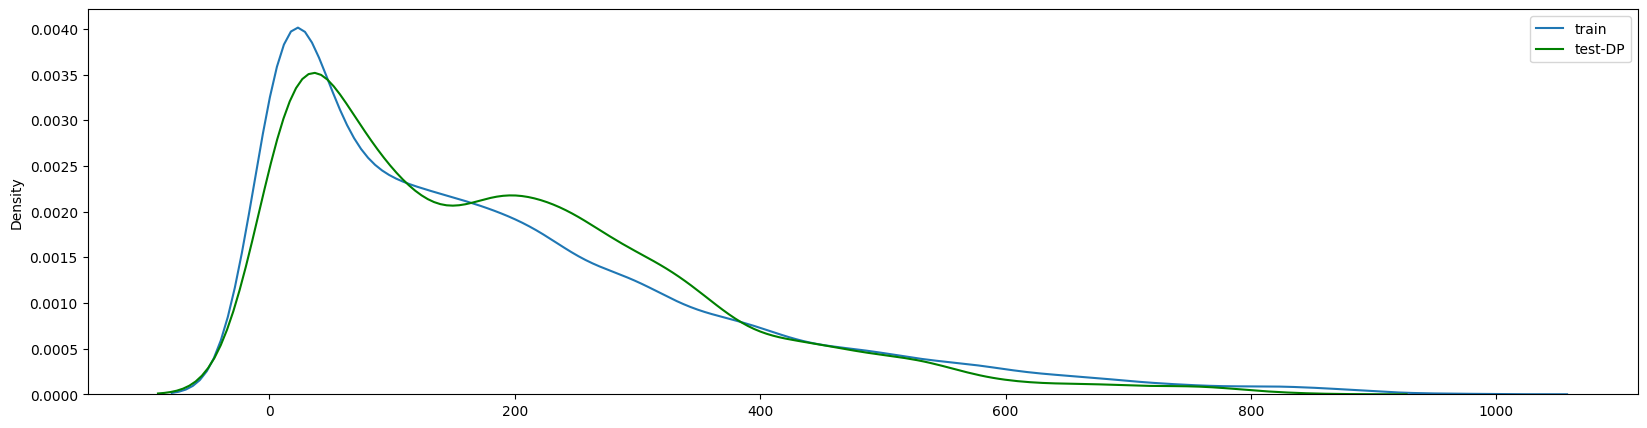

In [ ]:
plt.figure(figsize=(20,5))
ax1 = sns.kdeplot(y_train, label = 'train',color="red")
ax3 = sns.kdeplot(deep_learning_prediction1, label = 'test-DP',color="green")

plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Define the function to create the Keras model
def create_model(learning_rate=0.01, epochs=100, batch_size=32):
    model = keras.Sequential([
        keras.layers.Dense(units=32, activation='relu'),
        keras.layers.Dense(units=64, activation='relu'),
        keras.layers.Dense(units=128, activation='relu'),
        keras.layers.Dense(units=256, activation='relu'),
        keras.layers.Dense(units=64, activation='relu'),
        keras.layers.Dense(units=32, activation='relu'),
        keras.layers.Dense(units=16, activation='relu'),
        keras.layers.Dense(units=1, activation='linear')
    ])

    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    return model

# Create the KerasRegressor wrapper for the create_model function
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the hyperparameter search space
param_grid = {
    'learning_rate': np.arange(0.001, 0.1, 0.001),
    'epochs': np.arange(50, 200, 10),
    'batch_size': np.arange(16, 64, 8)
}

# Use RandomizedSearchCV to search for the best hyperparameters
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    verbose=2
)

# Fit the random search to the training data
random_search.fit(x_train, y_train)

# Print the best hyperparameters and corresponding mean test score
print("Best hyperparameters: ", random_search.best_params_)
print("Best mean test score: ", random_search.best_score_)

# Use the best hyperparameters to train the model on the full training data
best_model = create_model(**random_search.best_params_)
history = best_model.fit(x_train, y_train, epochs=random_search.best_params_['epochs'], batch_size=random_search.best_params_['batch_size'], verbose=0)

# Predict the values of y for the test data using the best model
y_pred = best_model.predict(x_test)
print("Predicted y values:", y_pred)


<ipython-input-134-efffbcddb1a6>:25: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[CV] END .....batch_size=16, epochs=170, learning_rate=0.021; total time= 5.4min


[CV] END .....batch_size=16, epochs=170, learning_rate=0.021; total time= 4.2min


[CV] END .....batch_size=16, epochs=170, learning_rate=0.021; total time= 4.4min


[CV] END .....batch_size=48, epochs=100, learning_rate=0.001; total time= 1.2min


[CV] END .....batch_size=48, epochs=100, learning_rate=0.001; total time= 1.1min


[CV] END .....batch_size=48, epochs=100, learning_rate=0.001; total time= 1.4min


[CV] END batch_size=56, epochs=50, learning_rate=0.08700000000000001; total time=  43.0s


[CV] END batch_size=56, epochs=50, learning_rate=0.08700000000000001; total time=  32.6s


[CV] END batch_size=56, epochs=50, learning_rate=0.08700000000000001; total time=  33.3s


[CV] END .....batch_size=56, epochs=120, learning_rate=0.029; total time= 1.3min


[CV] END .....batch_size=56, epochs=120, learning_rate=0.029; total time= 1.4min


[CV] END .....batch_size=56, epochs=120, learning_rate=0.029; total time= 1.3min


[CV] END .....batch_size=24, epochs=140, learning_rate=0.098; total time= 2.6min


[CV] END .....batch_size=24, epochs=140, learning_rate=0.098; total time= 2.6min


[CV] END .....batch_size=24, epochs=140, learning_rate=0.098; total time= 3.4min


[CV] END batch_size=16, epochs=160, learning_rate=0.08600000000000001; total time= 4.4min


[CV] END batch_size=16, epochs=160, learning_rate=0.08600000000000001; total time= 4.4min


[CV] END batch_size=16, epochs=160, learning_rate=0.08600000000000001; total time= 4.4min


[CV] END .....batch_size=24, epochs=100, learning_rate=0.042; total time= 2.4min


[CV] END .....batch_size=24, epochs=100, learning_rate=0.042; total time= 2.4min


[CV] END .....batch_size=24, epochs=100, learning_rate=0.042; total time= 2.4min


[CV] END ......batch_size=16, epochs=70, learning_rate=0.032; total time= 2.4min


[CV] END ......batch_size=16, epochs=70, learning_rate=0.032; total time= 2.4min


[CV] END ......batch_size=16, epochs=70, learning_rate=0.032; total time= 1.9min


[CV] END .....batch_size=56, epochs=160, learning_rate=0.084; total time= 2.4min


[CV] END .....batch_size=56, epochs=160, learning_rate=0.084; total time= 1.7min


[CV] END .....batch_size=56, epochs=160, learning_rate=0.084; total time= 1.7min


[CV] END batch_size=24, epochs=190, learning_rate=0.027000000000000003; total time= 4.4min


[CV] END batch_size=24, epochs=190, learning_rate=0.027000000000000003; total time= 3.3min


[CV] END batch_size=24, epochs=190, learning_rate=0.027000000000000003; total time= 3.4min


Best hyperparameters:  {'learning_rate': 0.032, 'epochs': 70, 'batch_size': 16}
Best mean test score:  -0.008186559503277143
109/109 [==============================] - 0s 2ms/step
Predicted y values: [[0.01839578]
 [0.06891342]
 [0.05154768]
 ...
 [0.07988279]
 [0.3241788 ]
 [0.10253984]]


Epoch 1/10
869/869 [==============================] - 9s 8ms/step - loss: 0.0180 - mae: 0.0955 - val_loss: 0.0178 - val_mae: 0.1066
Epoch 2/10
869/869 [==============================] - 4s 5ms/step - loss: 0.0137 - mae: 0.0817 - val_loss: 0.0141 - val_mae: 0.0836
Epoch 3/10
869/869 [==============================] - 4s 5ms/step - loss: 0.0118 - mae: 0.0753 - val_loss: 0.0123 - val_mae: 0.0740
Epoch 4/10
869/869 [==============================] - 5s 6ms/step - loss: 0.0108 - mae: 0.0716 - val_loss: 0.0105 - val_mae: 0.0690
Epoch 5/10
869/869 [==============================] - 4s 4ms/step - loss: 0.0099 - mae: 0.0684 - val_loss: 0.0097 - val_mae: 0.0675
Epoch 6/10
869/869 [==============================] - 4s 4ms/step - loss: 0.0098 - mae: 0.0679 - val_loss: 0.0101 - val_mae: 0.0681
Epoch 7/10
869/869 [==============================] - 5s 5ms/step - loss: 0.0094 - mae: 0.0662 - val_loss: 0.0098 - val_mae: 0.0692
Epoch 8/10
869/869 [==============================] - 5s 6ms/step - loss: 0.

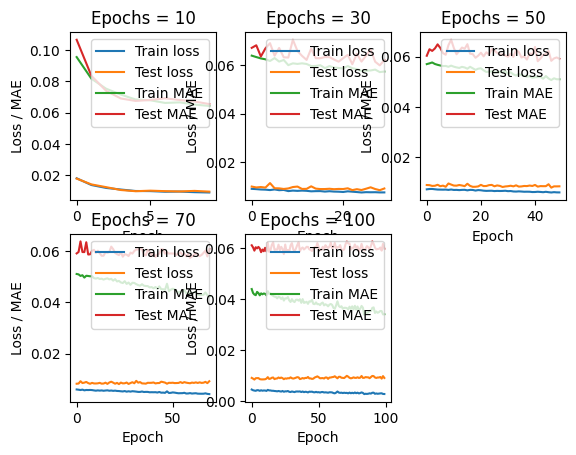

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Define the model with the specified hyperparameters
model = keras.Sequential([    keras.layers.Dense(units=32, activation='relu'),    keras.layers.Dense(units=64, activation='relu'),    keras.layers.Dense(units=128, activation='relu'),    keras.layers.Dense(units=256, activation='relu'),    keras.layers.Dense(units=64, activation='relu'),    keras.layers.Dense(units=32, activation='relu'),    keras.layers.Dense(units=16, activation='relu'),    keras.layers.Dense(units=1, activation='linear')])

optimizer = keras.optimizers.Adam(lr=0.032)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Train the model with different numbers of epochs
epochs = [10, 30, 50, 70, 100]
histories = []
for e in epochs:
    history = model.fit(x_train, y_train, epochs=e, batch_size=16, validation_data=(x_test, y_test))
    histories.append(history)

# Plot the training and test loss with accuracy over time for each number of epochs
for i, history in enumerate(histories):
    plt.subplot(2, 3, i+1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Epochs = ' + str(epochs[i]))
    plt.ylabel('Loss / MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train loss', 'Test loss', 'Train MAE', 'Test MAE'], loc='upper right')
plt.show()


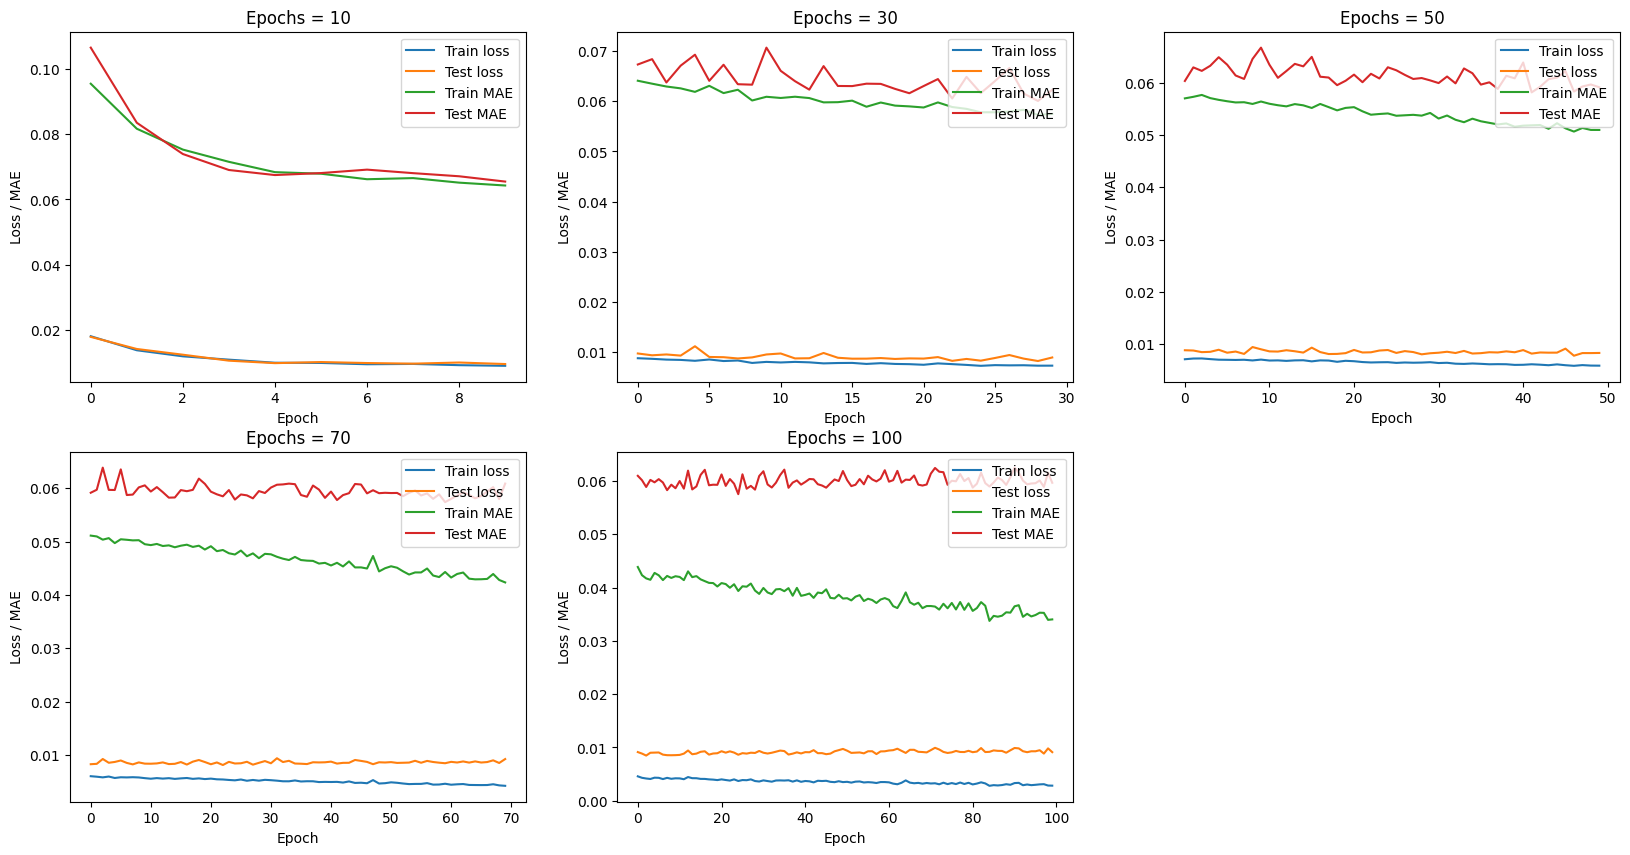

In [ ]:
plt.figure(figsize=(20,10))

for i, history in enumerate(histories):
    plt.subplot(2, 3, i+1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Epochs = ' + str(epochs[i]))
    plt.ylabel('Loss / MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train loss', 'Test loss', 'Train MAE', 'Test MAE'], loc='upper right')
plt.show()

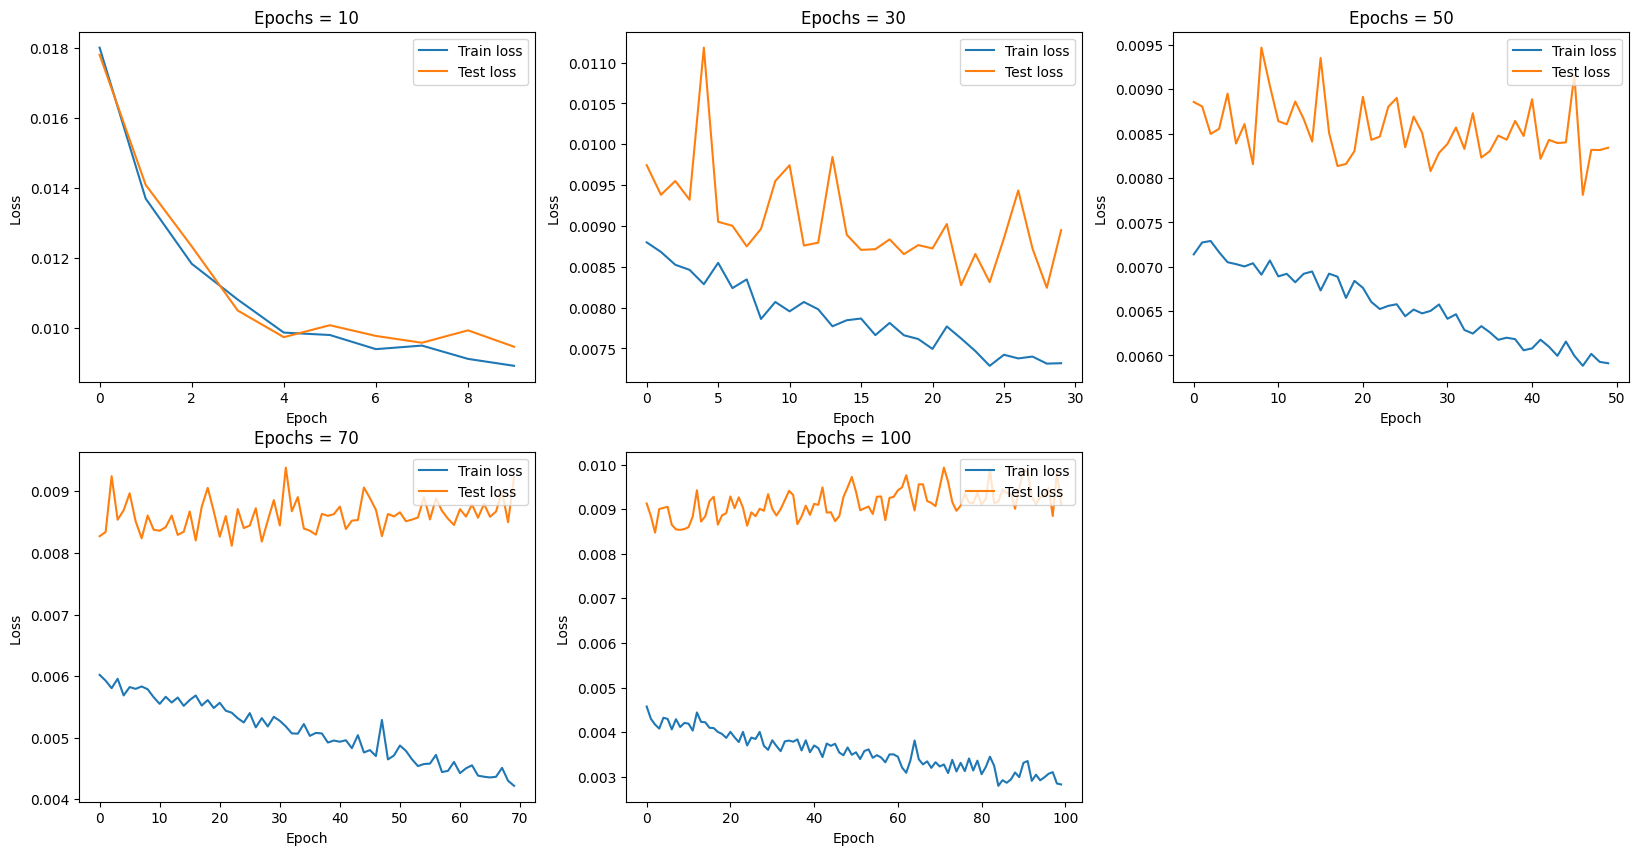

In [ ]:
plt.figure(figsize=(20,10))

for i, history in enumerate(histories):
    plt.subplot(2, 3, i+1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title('Epochs = ' + str(epochs[i]))
    plt.ylabel('Loss ')
    plt.xlabel('Epoch')
    plt.legend(['Train loss', 'Test loss'], loc='upper right')
plt.show()

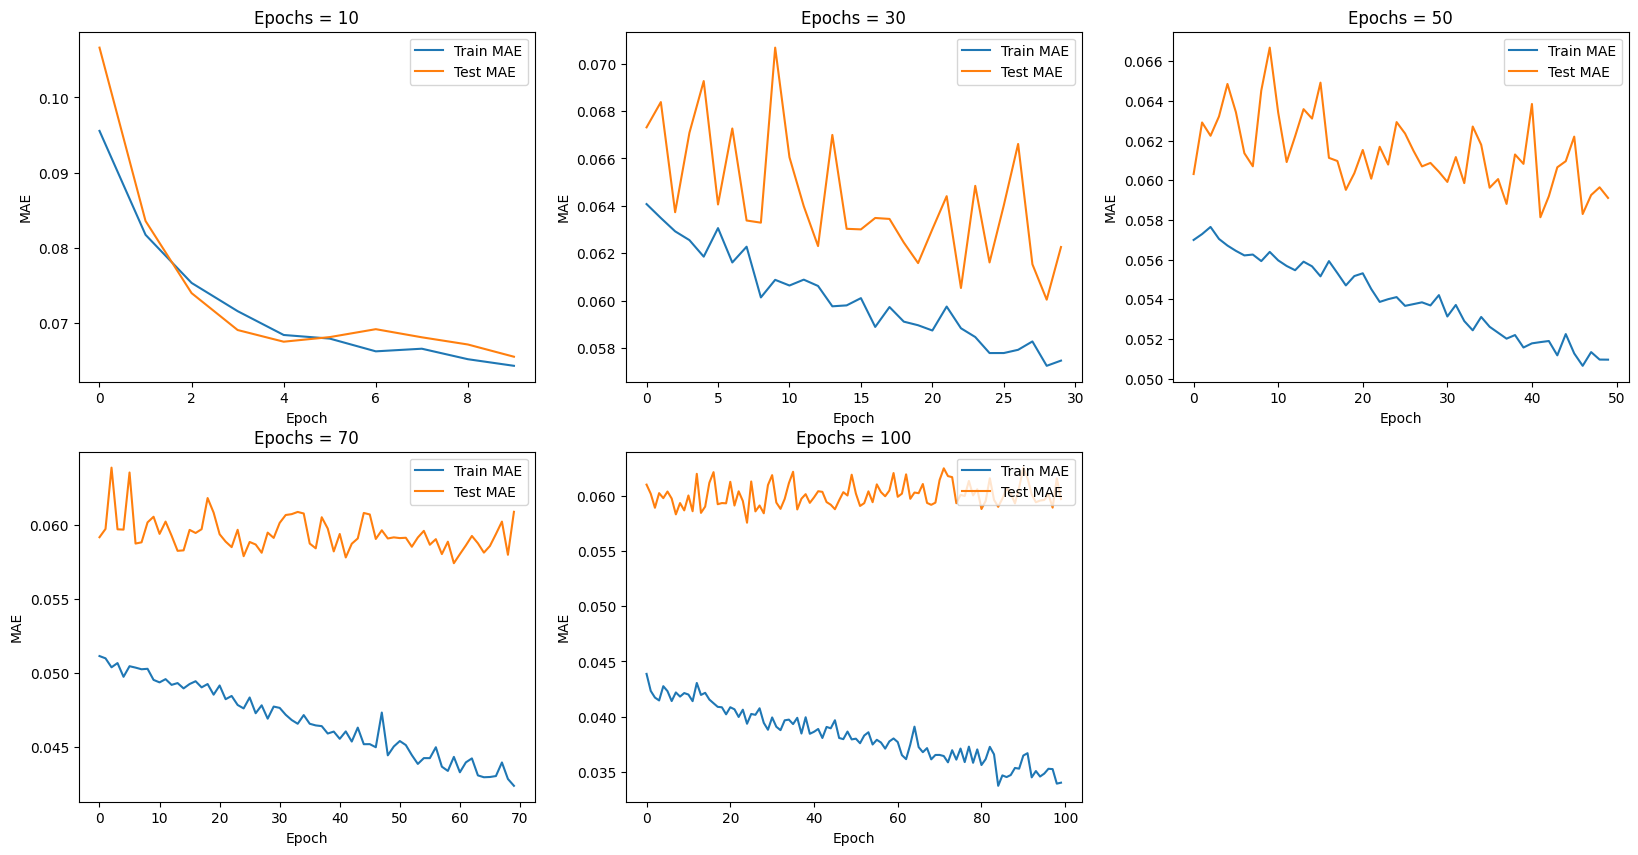

In [ ]:
plt.figure(figsize=(20,10))

for i, history in enumerate(histories):
    plt.subplot(2, 3, i+1)

    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Epochs = ' + str(epochs[i]))
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend([ 'Train MAE', 'Test MAE'], loc='upper right')
plt.show()

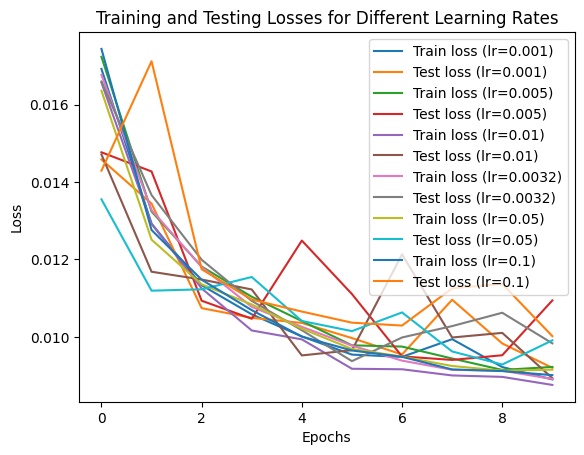

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Define the model with the specified hyperparameters
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(units=32, activation='relu'),
        keras.layers.Dense(units=64, activation='relu'),
        keras.layers.Dense(units=128, activation='relu'),
        keras.layers.Dense(units=256, activation='relu'),
        keras.layers.Dense(units=64, activation='relu'),
        keras.layers.Dense(units=32, activation='relu'),
        keras.layers.Dense(units=16, activation='relu'),
        keras.layers.Dense(units=1, activation='linear')
    ])
    return model

learning_rates = [0.001, 0.005, 0.01, 0.0032, 0.05, 0.1]

# Loop over learning rates
for lr in learning_rates:
    model = create_model()
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    # Train the model on the training data
    history = model.fit(x_train, y_train, epochs=10, batch_size=16, validation_data=(x_test, y_test), verbose=0)

    # Plot training and testing losses
    plt.plot(history.history['loss'], label=f'Train loss (lr={lr})')
    plt.plot(history.history['val_loss'], label=f'Test loss (lr={lr})')

plt.title('Training and Testing Losses for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Based on the results obtained from random search, the best learning rate for the given problem was found to be 0.0032, which resulted in the highest accuracy on the testing set. The validation of this assumption can be observed from the training and testing loss plots, where the model trained with a learning rate of 0.0032 achieved the lowest testing loss among all the tested learning rates. Therefore, it can be concluded that the learning rate of 0.0032 is the optimal choice for this specific problem.

It's important to note that random search was used to find the optimal learning rate among a range of values, and this approach can be useful in cases where there are many hyperparameters to tune. However, the optimal learning rate may vary depending on the specific problem and dataset, and it's always a good practice to validate the results by testing the model on an independent testing set.

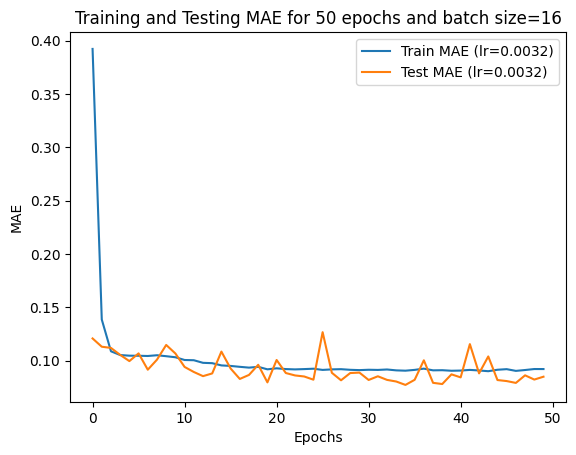

In [ ]:
from tensorflow.keras import regularizers

def create_improved_model(input_size):
    model = keras.Sequential([
        keras.layers.Dense(units=64, activation='relu', input_shape=(input_size,)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(units=256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(units=32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(units=1, activation='linear')
    ])
    return model

learning_rates = [ 0.0032]
epochs = 50
batch_size = 16

for lr in learning_rates:
    model = create_improved_model(8)
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    # Train the model on the training data
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=0)

    # Plot training and testing losses
    plt.plot(history.history['mae'], label=f'Train MAE (lr={lr})')
    plt.plot(history.history['val_mae'], label=f'Test MAE (lr={lr})')

plt.title(f'Training and Testing MAE for {epochs} epochs and batch size={batch_size}')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras import regularizers
input_size=8
model = keras.Sequential([
    keras.layers.Dense(units=64, activation='relu', input_shape=(input_size,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(units=256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(units=32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(units=1, activation='linear')
])

optimizer = keras.optimizers.Adam(lr=0.0032)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

history = model.fit(x_train, y_train, epochs=10, verbose=0)

y_pred_deep = model.predict(x_test)
print("Predicted y values:", y_pred)


109/109 [==============================] - 0s 2ms/step
Predicted y values: [[0.065359  ]
 [0.05075482]
 [0.04518203]
 ...
 [0.1428935 ]
 [0.12473664]
 [0.11454485]]


In [ ]:
deep_learning_prediction=np.array(y_pred)

In [ ]:
deep_learning_prediction1 = []
for i in range(len(deep_learning_prediction)):
    deep_learning_prediction1.append(deep_learning_prediction[i][0])
deep_learning_prediction1 = np.array(deep_learning_prediction1)
deep_learning_prediction1

array([0.065359  , 0.05075482, 0.04518203, ..., 0.1428935 , 0.12473664,
       0.11454485], dtype=float32)

In [ ]:
print('R2 score best Deep learning', r2_score(y_test, deep_learning_prediction1))
print('MAE Deep best Deep learning', mean_absolute_error(y_test, deep_learning_prediction1))
RMSE4 = RMSE(y_test,deep_learning_prediction1)
LR_MAPE4= MAPE(y_test,deep_learning_prediction1)

print("Root Mean Square Error and Mean Absolute Percentage Error Deep learning:\n")
print(RMSE4)
print(LR_MAPE4)

R2 score best Deep learning 0.7624892888306303
MAE Deep best Deep learning 0.059527350803971014
Root Mean Square Error and Mean Absolute Percentage Error Deep learning:

0.09128472826415136
104.17443176765664


**2-1-5 RandomForest Regressor**

relation_square :  0.956226549572305


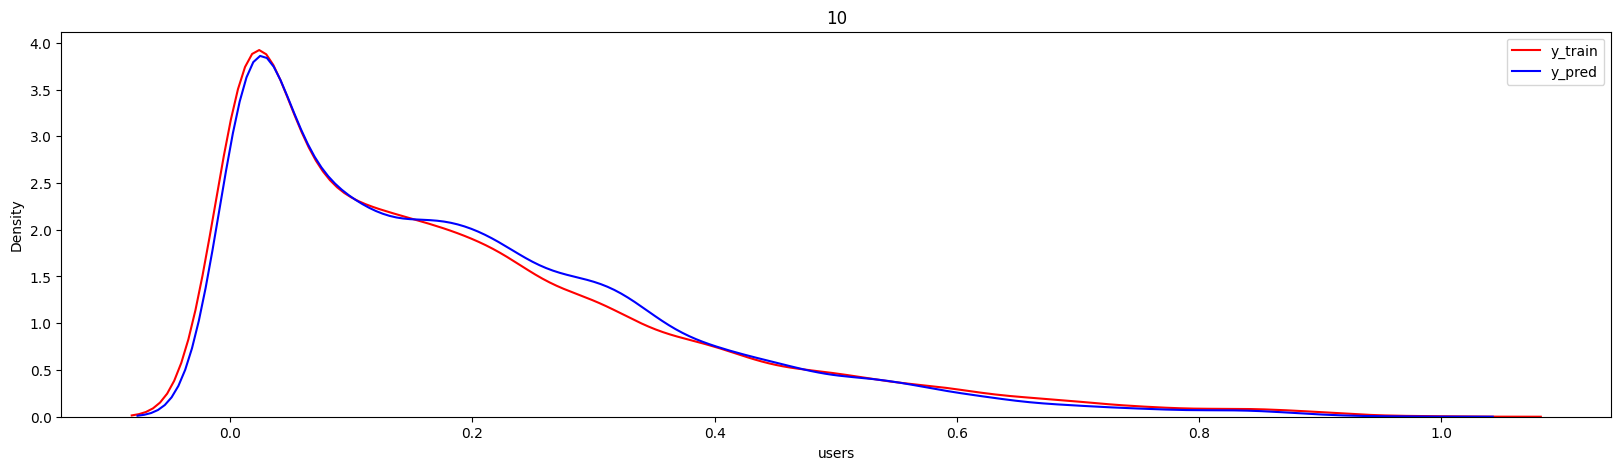

relation_square :  0.962385029512972


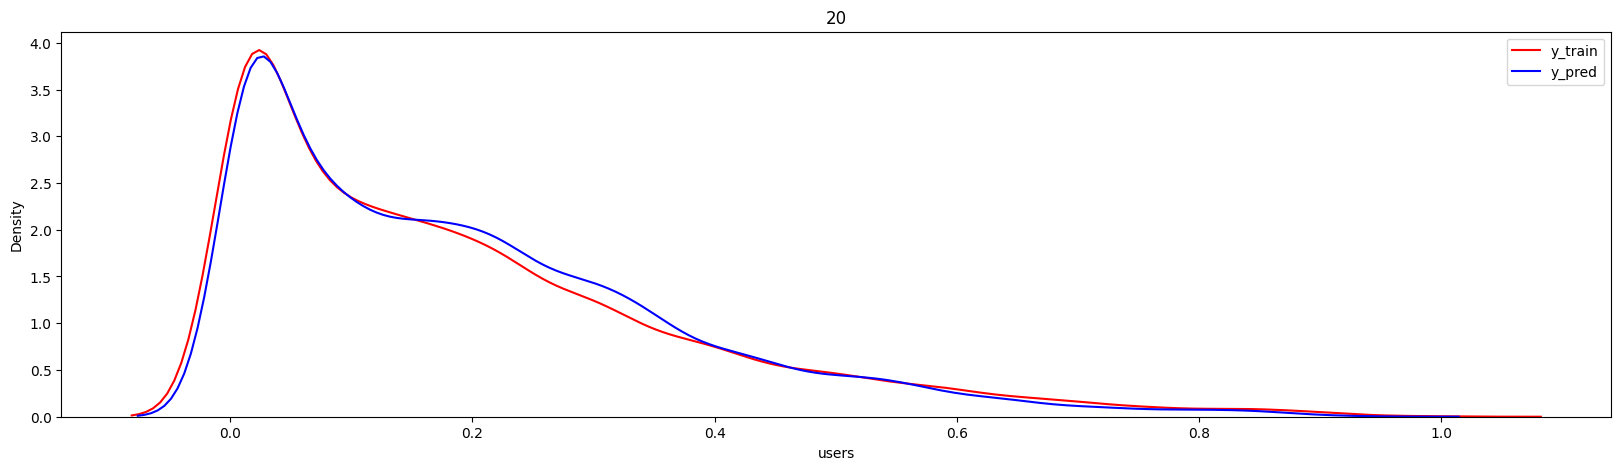

relation_square :  0.9647567037820192


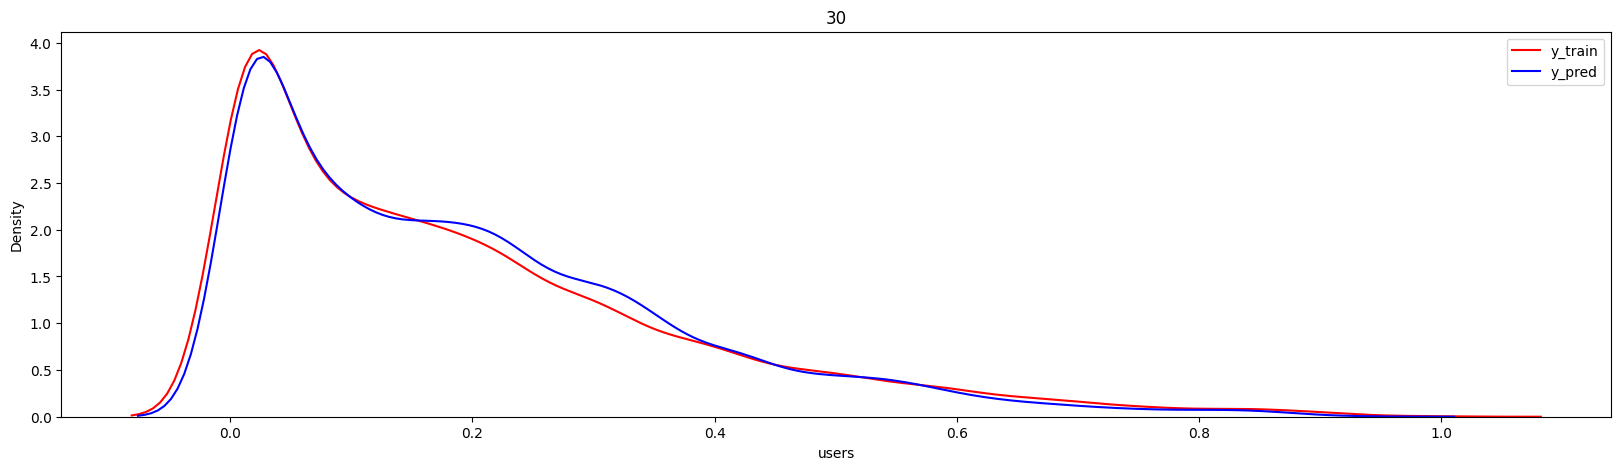

relation_square :  0.965726485275102


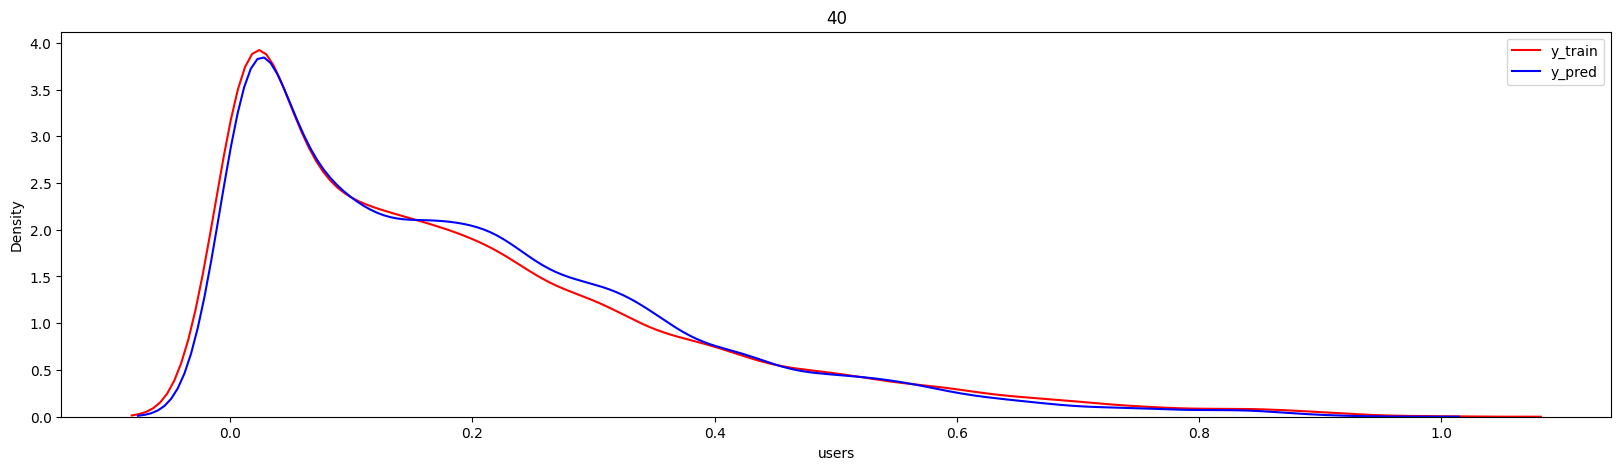

relation_square :  0.9679753416517869


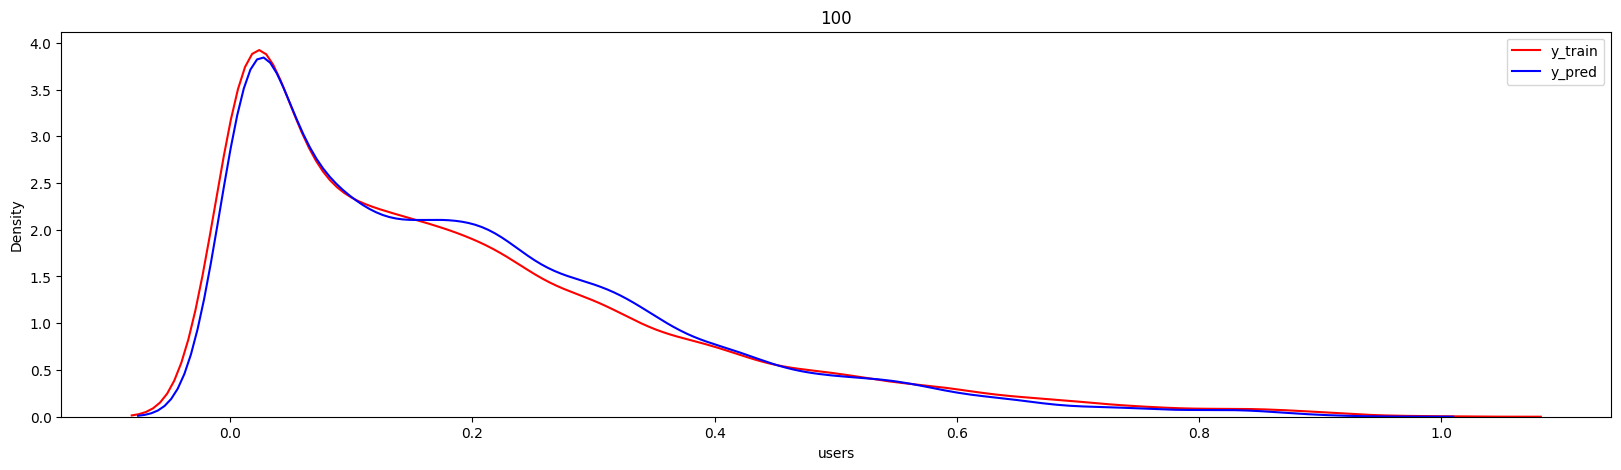

relation_square :  0.968565306006983


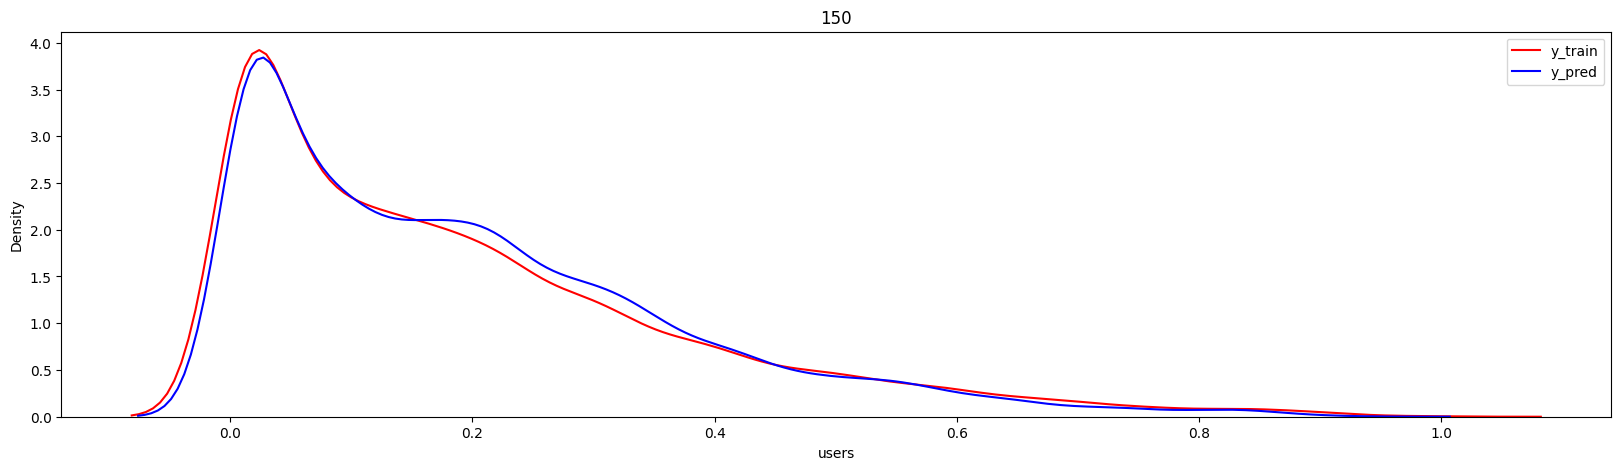

relation_square :  0.9688361463507017


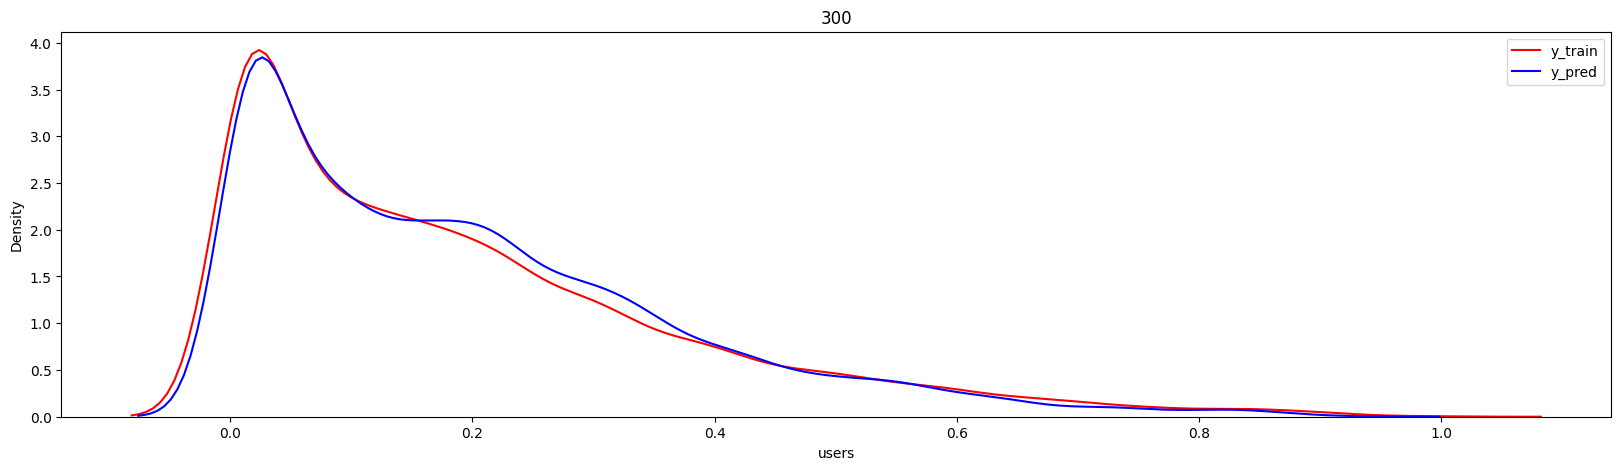

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Check the result according to "n_estimators".
for i in (10, 20, 30, 40, 100, 150,300):
    model = RandomForestRegressor(n_estimators= i,n_jobs= -1, random_state = 15)
    model.fit(x_train,y_train)
    # The higher the "n_estimators" value, the higher the accuracy,
    # but the more computational it takes for the computer to calculate and derive results.
    # I set the value to 300 appropriately.

    relation_square = model.score(x_train, y_train)
    print('relation_square : ', relation_square)
    plt.figure(figsize=(20,5))
    y_p = model.predict(x_train)
    ax1 = sns.kdeplot(y_train,label = 'y_train',color="red")
    ax2 = sns.kdeplot(y_p,label = 'y_pred',color="blue")

    plt.title(i)
    plt.legend()
    plt.show()

In [ ]:
model = RandomForestRegressor(n_estimators=300, n_jobs = -1 , random_state = 0)
model.fit(x_train, y_train)

predictions = model.predict(x_test)
predictions

array([0.00520057, 0.07778574, 0.08541795, ..., 0.12054248, 0.33671102,
       0.11064824])

In [ ]:
print('R2 score Random forest regression', r2_score(y_test, predictions))
print('MAE Random forest regression', mean_absolute_error(y_test, predictions))
RMSE5 = RMSE(y_test,predictions)
LR_MAPE5= MAPE(y_test,predictions)

print("Root Mean Square Error and Mean Absolute Percentage Error Deep learning:\n")
print(RMSE5)
print(LR_MAPE5)

R2 score Random forest regression 0.7680122762677734
MAE Random forest regression 0.057843208172780415


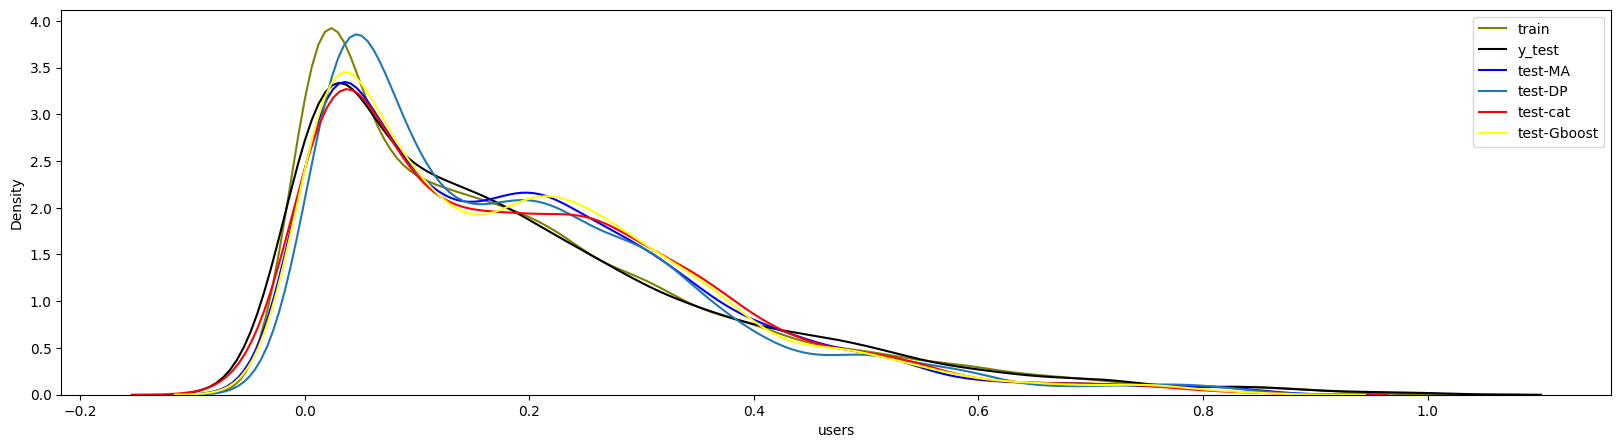

In [ ]:
plt.figure(figsize=(20,5))
ax1 = sns.kdeplot(y_train, label = 'train',color="olive")
ax2 = sns.kdeplot(y_test, label = 'test',color="black")
ax3 = sns.kdeplot(predictions, label = 'test-random',color="blue")
ax4 = sns.kdeplot(y_pred, label = 'test-DP',color="green")
ax5 = sns.kdeplot(preds3, label = 'test-cat',color="red")
ax6 = sns.kdeplot(preds2, label = 'test-Gboost',color="yellow")


plt.legend()
plt.show()

##**Prophet**

In [ ]:
from prophet import Prophet


In [ ]:
df

Date  season  year  month  Hour  holiday  weekday  workingday  \
1      2011-01-01     1.0   0.0    1.0   0.0      0.0      6.0         0.0   
3      2011-01-01     1.0   0.0    1.0   1.0      0.0      6.0         0.0   
5      2011-01-01     1.0   0.0    1.0   2.0      0.0      6.0         0.0   
7      2011-01-01     1.0   0.0    1.0   3.0      0.0      6.0         0.0   
9      2011-01-01     1.0   0.0    1.0   4.0      0.0      6.0         0.0   
...           ...     ...   ...    ...   ...      ...      ...         ...   
34749  2012-12-31     1.0   1.0   12.0  19.0      0.0      1.0         1.0   
34751  2012-12-31     1.0   1.0   12.0  20.0      0.0      1.0         1.0   
34753  2012-12-31     1.0   1.0   12.0  21.0      0.0      1.0         1.0   
34755  2012-12-31     1.0   1.0   12.0  22.0      0.0      1.0         1.0   
34757  2012-12-31     1.0   1.0   12.0  23.0      0.0      1.0         1.0   

       weather  temperature  temperature felt  humidity  windspeed  users  
1          1.0         0.24            0.2879      0.81     0.0000   16.0  
3          1.0         0.22            0.2727      0.80     0.0000   40.0  
5          1.0         0.22            0.2727      0.80     0.0000   32.0  
7          1.0         0.24            0.2879      0.75     0.0000   13.0  
9          1.0         0.24            0.2879      0.75     0.0000    1.0  
...        ...          ...               ...       ...        ...    ...  
34749      2.0         0.26            0.2576      0.60     0.1642  119.0  
34751      2.0         0.26            0.2576      0.60     0.1642   89.0  
34753      1.0         0.26            0.2576      0.60     0.1642   90.0  
34755      1.0         0.26            0.2727      0.56     0.1343   61.0  
34757      1.0         0.26            0.2727      0.65     0.1343   49.0  

[17379 rows x 14 columns]

In [ ]:
dt=pd.DataFrame()
dt['ds']=df['Date']
dt['y']=df['users']

In [ ]:
from pandas import to_datetime

dt['ds']= to_datetime(dt['ds'])

In [ ]:
m = Prophet()
m.fit(dt)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2k6ypky3/55uk14uu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2k6ypky3/ecd_zvog.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31072', 'data', 'file=/tmp/tmp2k6ypky3/55uk14uu.json', 'init=/tmp/tmp2k6ypky3/ecd_zvog.json', 'output', 'file=/tmp/tmp2k6ypky3/prophet_modelfic4wbbl/prophet_model-20230616140300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:03:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:03:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=7)
future.tail()

ds
733 2013-01-03
734 2013-01-04
735 2013-01-05
736 2013-01-06
737 2013-01-07

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds        yhat  yhat_lower  yhat_upper
733 2013-01-03  149.479804  -70.808635  367.783385
734 2013-01-04  151.931360  -63.563678  369.071955
735 2013-01-05  150.319611  -62.625672  357.324501
736 2013-01-06  139.829268  -69.741080  355.099237
737 2013-01-07  149.418774  -71.063857  350.215348

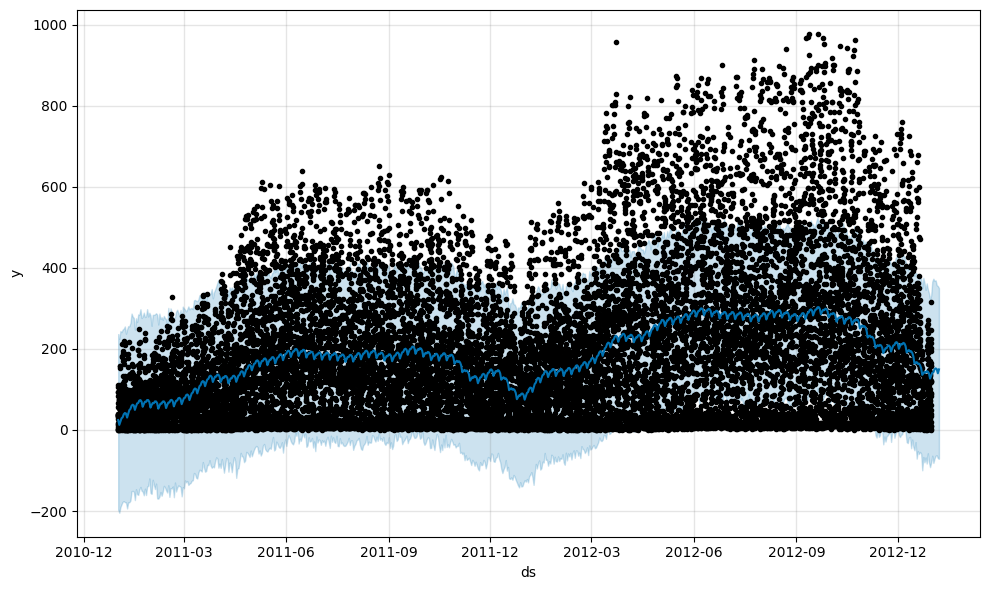

In [ ]:
fig1 = m.plot(forecast)


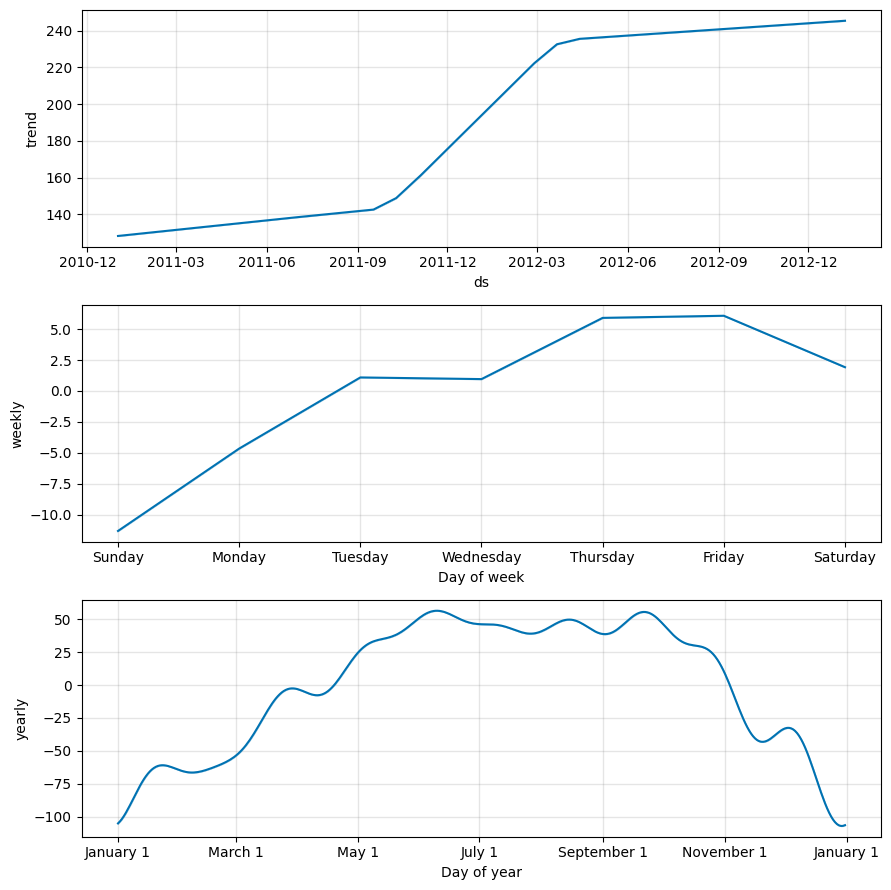

In [ ]:
fig2 = m.plot_components(forecast)


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)
plot_components_plotly(m, forecast)

In [ ]:
#Manually Evaluate Forecast Model


In [ ]:
# create test dataset, remove last 12 months
train = dt.drop(dt.index[-12:])
print(train.tail())

              ds      y
34725 2012-12-31   85.0
34727 2012-12-31  196.0
34729 2012-12-31  157.0
34731 2012-12-31  120.0
34733 2012-12-31  157.0


In [ ]:
# calculate MAE between expected and predicted values for december
y_true = dt['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 109.322


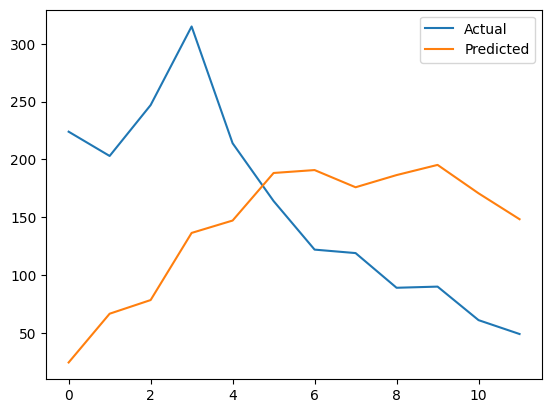

In [ ]:
...
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
1091 2013-12-27
1092 2013-12-28
1093 2013-12-29
1094 2013-12-30
1095 2013-12-31

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds        yhat  yhat_lower  yhat_upper
1091 2013-12-27  158.738613  -55.947547  387.372273
1092 2013-12-28  153.649050  -71.808595  369.273795
1093 2013-12-29  139.982983  -79.840093  361.589442
1094 2013-12-30  146.749426  -68.496561  370.641888
1095 2013-12-31  153.095706  -73.017139  383.378978

Text(71.84722222222221, 0.5, 'Scooter users')

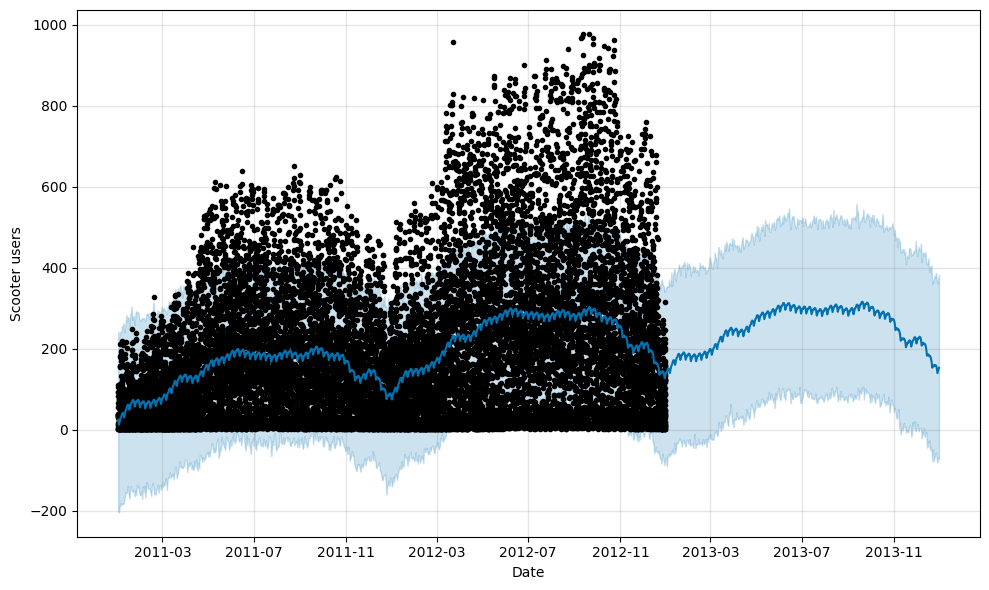

In [ ]:
fig1 = m.plot(forecast)
plt.xlabel("Date")
plt.ylabel("Scooter users")



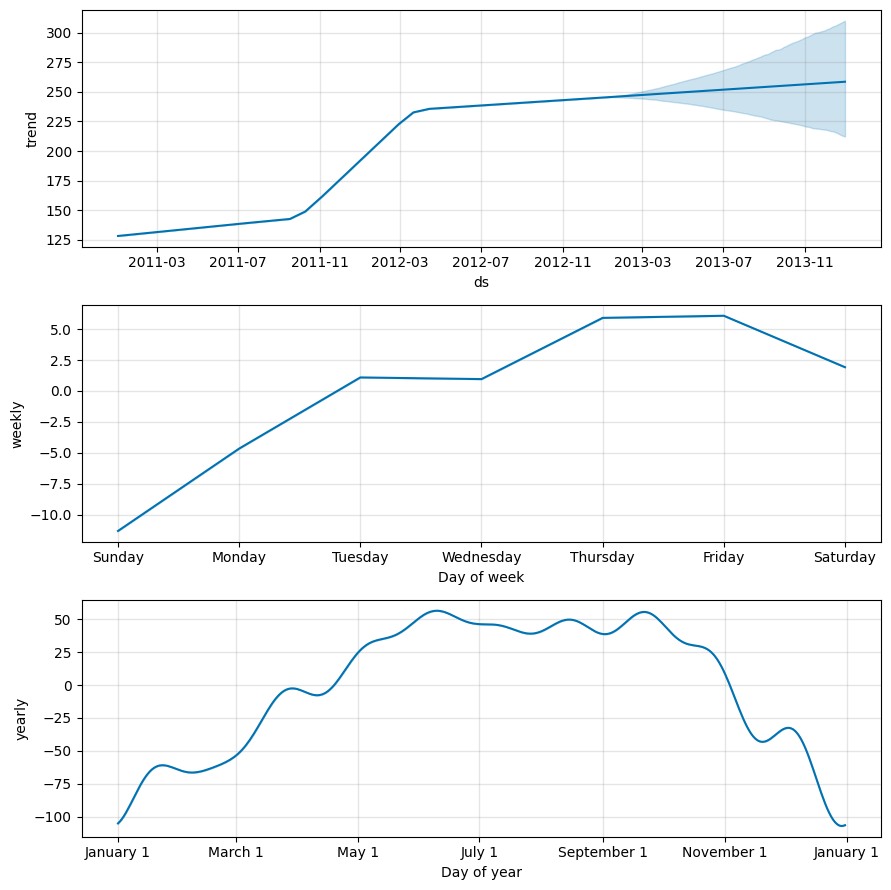

In [ ]:
fig2 = m.plot_components(forecast)


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)
plot_components_plotly(m, forecast)

##**XGBoosted Time series**

In [ ]:

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
dt = dt.set_index('ds')
dt.index = pd.to_datetime(dt.index)

In [ ]:
dt

y
ds               
2011-01-01   16.0
2011-01-01   40.0
2011-01-01   32.0
2011-01-01   13.0
2011-01-01    1.0
...           ...
2012-12-31  119.0
2012-12-31   89.0
2012-12-31   90.0
2012-12-31   61.0
2012-12-31   49.0

[17379 rows x 1 columns]

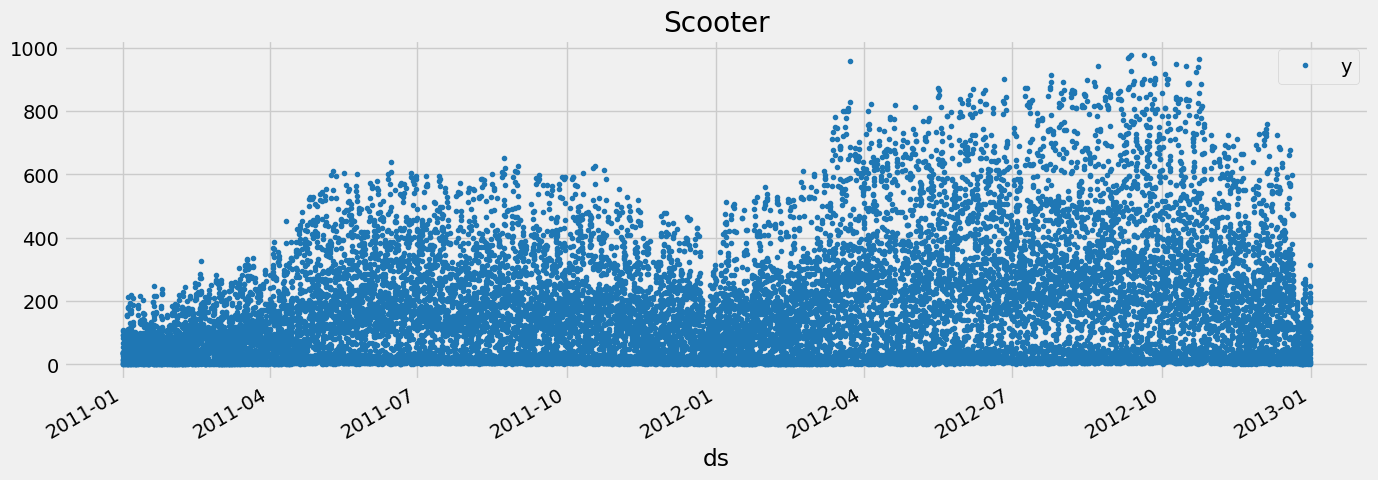

In [ ]:
dt.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Scooter')
plt.show()

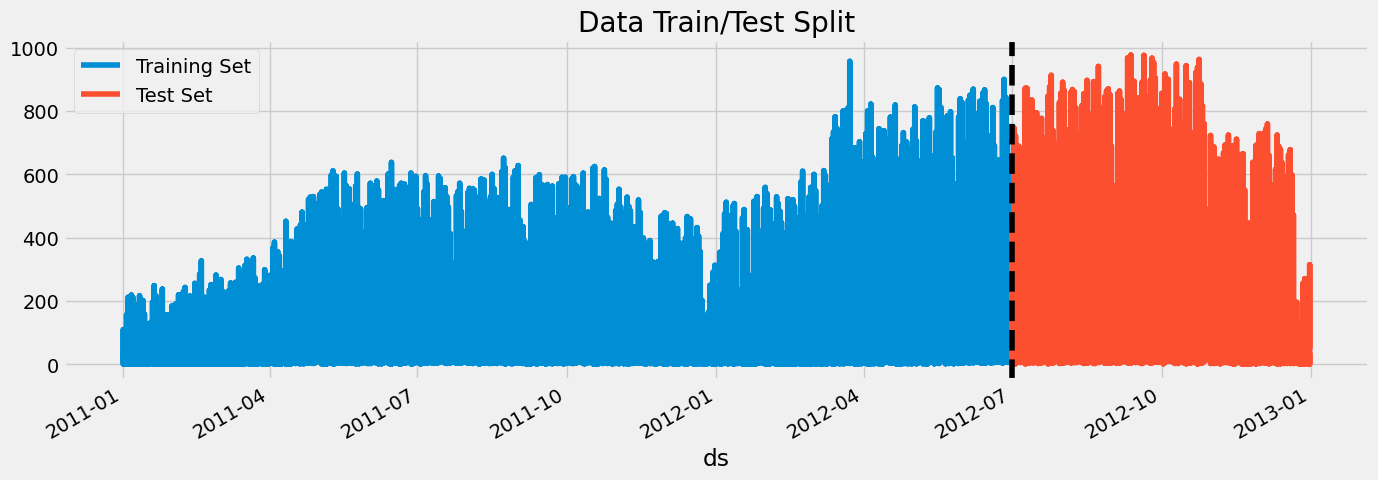

In [ ]:
train = dt.loc[dt.index < '07-01-2012']
test = dt.loc[dt.index >= '07-01-2012']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('07-01-2012', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

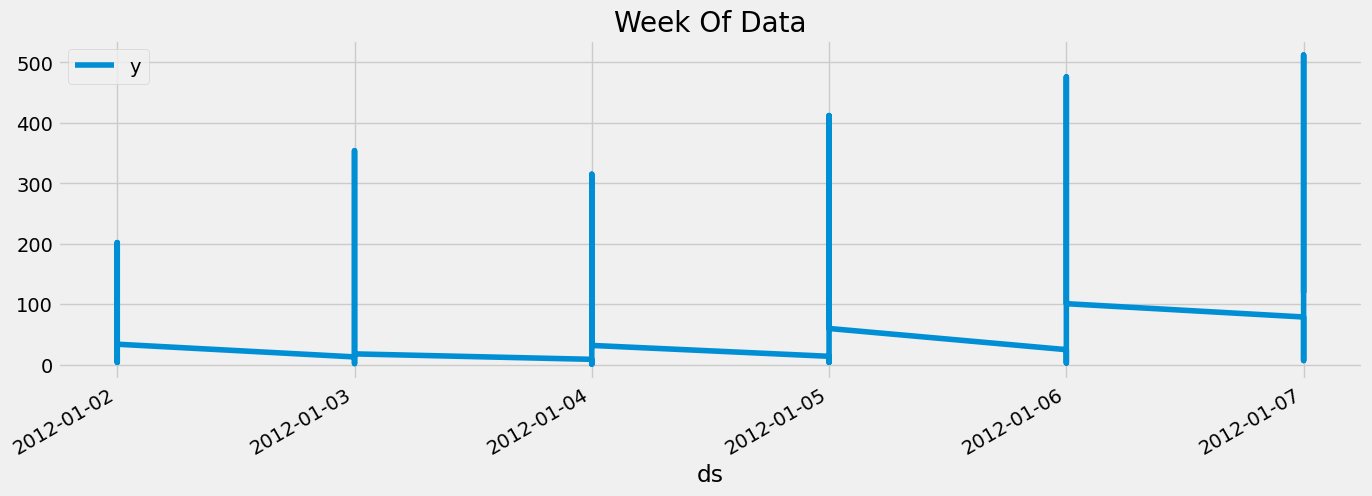

In [ ]:
dt.loc[(dt.index > '01-01-2012') & (dt.index < '01-08-2012')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

dt = create_features(dt)

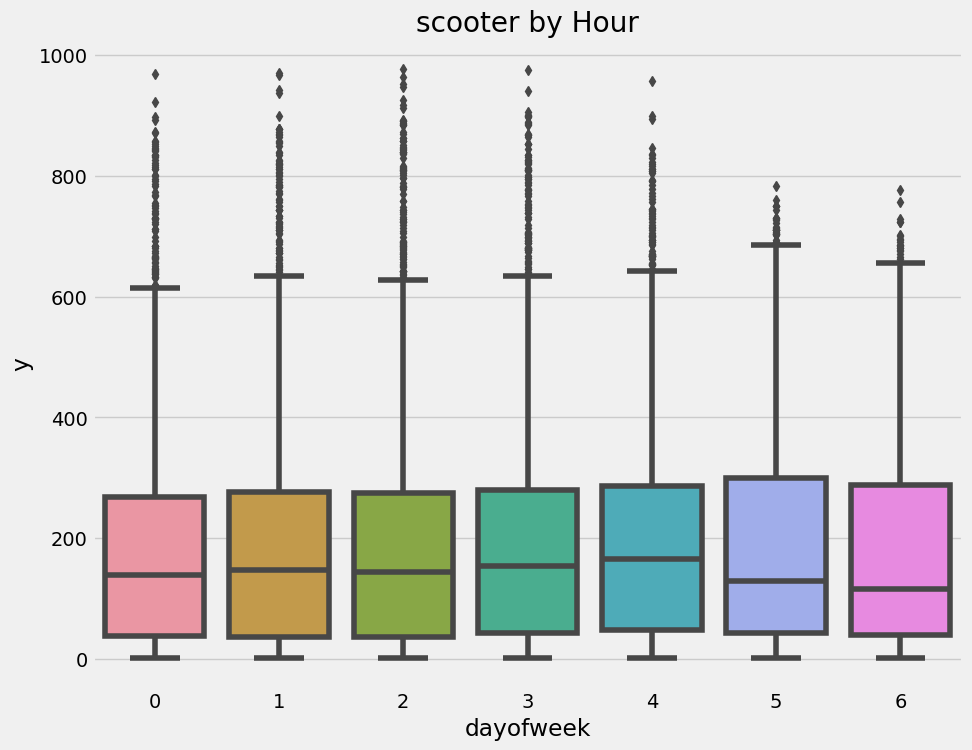

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=dt, x='dayofweek', y='y')
ax.set_title('scooter by Hour')
plt.show()

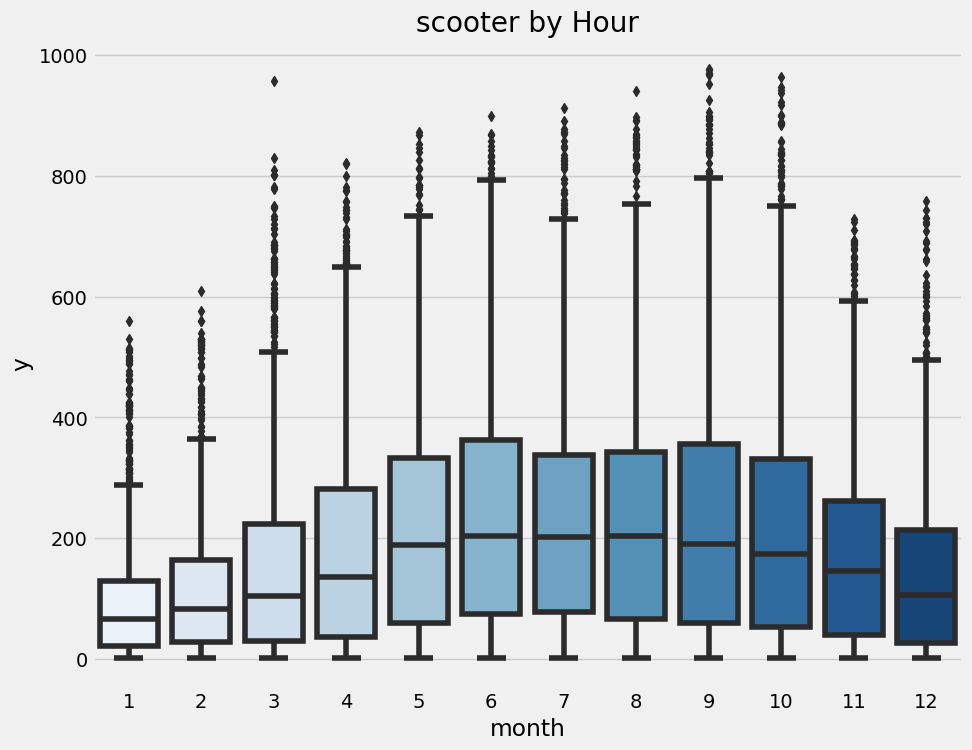

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=dt, x='month', y='y', palette='Blues')
ax.set_title('scooter by Hour')
plt.show()

In [ ]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'y'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[16:02:09] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:230.61845	validation_1-rmse:333.41399
[100]	validation_0-rmse:162.38845	validation_1-rmse:233.31951
[200]	validation_0-rmse:150.20054	validation_1-rmse:219.04318
[300]	validation_0-rmse:148.21718	validation_1-rmse:216.62737
[400]	validation_0-rmse:147.77520	validation_1-rmse:216.19590
[486]	validation_0-rmse:147.58055	validation_1-rmse:216.36084


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

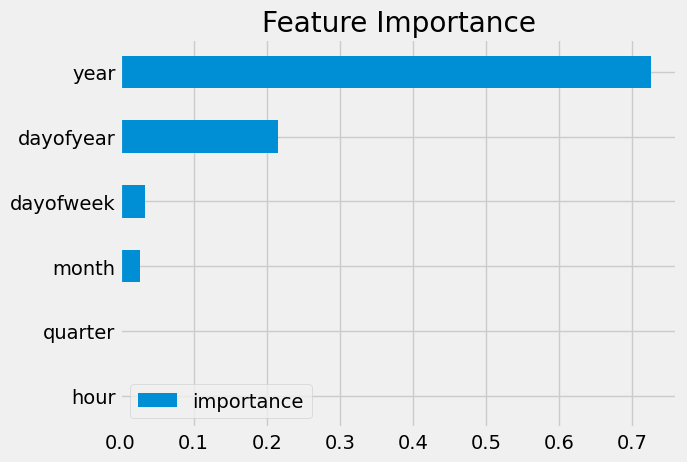

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [ ]:
test['prediction'] = reg.predict(X_test)
dt = dt.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = dt[['y']].plot(figsize=(15, 5))
dt['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
ax.set_xlabel('Date')

plt.show()

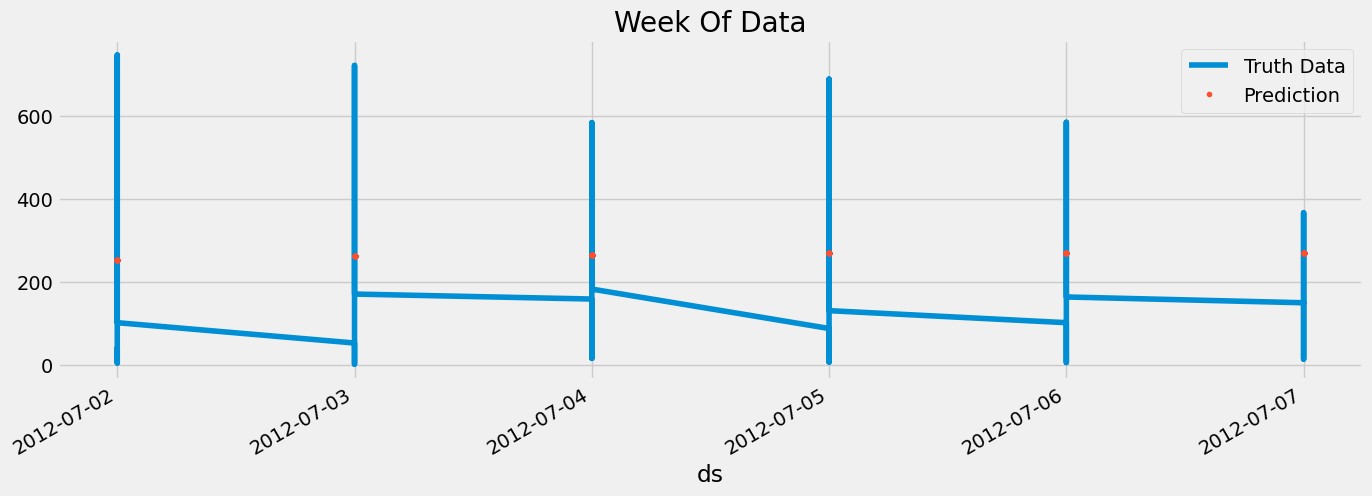

In [ ]:
ax = dt.loc[(dt.index > '07-01-2012') & (dt.index < '07-08-2012')]['y'] \
    .plot(figsize=(15, 5), title='Week Of Data')
dt.loc[(dt.index > '07-01-2012') & (dt.index < '07-08-2012')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [ ]:
score = np.sqrt(mean_squared_error(test['y'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 216.10


In [ ]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)


date
2012-09-29    240.360339
2012-09-09    239.875000
2012-09-15    235.970678
2012-10-20    232.289570
2012-09-23    232.161222
2012-09-22    228.360339
2012-10-27    219.750000
2012-10-06    218.024475
2012-08-18    217.434052
2012-09-16    216.208333
Name: error, dtype: float64

#**LSTM**

In [ ]:
df

Date year month  Hour holiday weekday workingday weather  \
1     2011-01-01  0.0   1.0   0.0     0.0     6.0        0.0     1.0   
3     2011-01-01  0.0   1.0   1.0     0.0     6.0        0.0     1.0   
5     2011-01-01  0.0   1.0   2.0     0.0     6.0        0.0     1.0   
7     2011-01-01  0.0   1.0   3.0     0.0     6.0        0.0     1.0   
9     2011-01-01  0.0   1.0   4.0     0.0     6.0        0.0     1.0   
...          ...  ...   ...   ...     ...     ...        ...     ...   
34749 2012-12-31  1.0  12.0  19.0     0.0     1.0        1.0     2.0   
34751 2012-12-31  1.0  12.0  20.0     0.0     1.0        1.0     2.0   
34753 2012-12-31  1.0  12.0  21.0     0.0     1.0        1.0     1.0   
34755 2012-12-31  1.0  12.0  22.0     0.0     1.0        1.0     1.0   
34757 2012-12-31  1.0  12.0  23.0     0.0     1.0        1.0     1.0   

       temperature felt  humidity  windspeed  users  
1                0.2879      0.81     0.0000   16.0  
3                0.2727      0.80     0.0000   40.0  
5                0.2727      0.80     0.0000   32.0  
7                0.2879      0.75     0.0000   13.0  
9                0.2879      0.75     0.0000    1.0  
...                 ...       ...        ...    ...  
34749            0.2576      0.60     0.1642  119.0  
34751            0.2576      0.60     0.1642   89.0  
34753            0.2576      0.60     0.1642   90.0  
34755            0.2727      0.56     0.1343   61.0  
34757            0.2727      0.65     0.1343   49.0  

[17379 rows x 12 columns]

In [ ]:
df.index = pd.to_datetime(df['Date'], format='%Y.%m.%d ')


<Axes: xlabel='Date'>

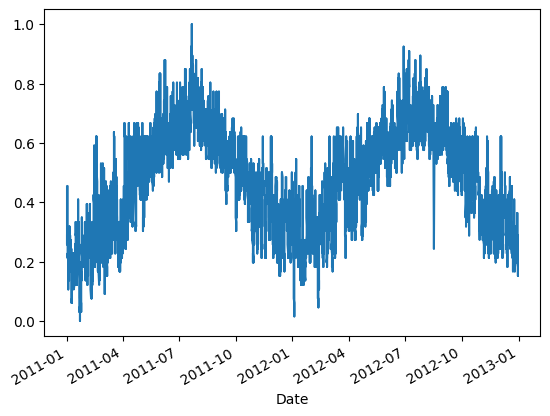

In [ ]:
temp = df['temperature felt']
temp.plot()

<Axes: xlabel='Date'>

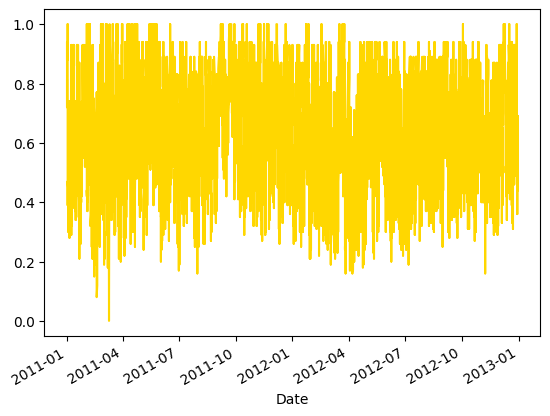

In [ ]:
temp1 = df['humidity']
temp1.plot(color='gold')

In [ ]:
def df_to_X_y(df, window_size=2):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 2
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((17377, 2, 1), (17377,))

In [ ]:
X_train1, y_train1 = X1[:10000], y1[:10000]
X_val1, y_val1 = X1[10000:15000], y1[10000:15000]
X_test1, y_test1 = X1[15000:], y1[15000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((10000, 2, 1), (10000,), (5000, 2, 1), (5000,), (2377, 2, 1), (2377,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((2, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
296/313 [===========================>..] - ETA: 0s - loss: 0.1113 - root_mean_squared_error: 0.3337

313/313 [==============================] - 7s 17ms/step - loss: 0.1067 - root_mean_squared_error: 0.3267 - val_loss: 0.0379 - val_root_mean_squared_error: 0.1946
Epoch 2/10
307/313 [============================>.] - ETA: 0s - loss: 0.0097 - root_mean_squared_error: 0.0986

313/313 [==============================] - 4s 14ms/step - loss: 0.0097 - root_mean_squared_error: 0.0983 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0741
Epoch 3/10
307/313 [============================>.] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.0664

313/313 [==============================] - 4s 13ms/step - loss: 0.0044 - root_mean_squared_error: 0.0662 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0513
Epoch 4/10
301/313 [===========================>..] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0469

313/313 [==============================] - 5s 17ms/step - loss: 0.0022 - root_mean_squared_error: 0.0466 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0377
Epoch 5/10
299/313 [===========================>..] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0352

313/313 [==============================] - 4s 14ms/step - loss: 0.0012 - root_mean_squared_error: 0.0350 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0331
Epoch 6/10
308/313 [============================>.] - ETA: 0s - loss: 0.0010 - root_mean_squared_error: 0.0317

313/313 [==============================] - 6s 20ms/step - loss: 9.9778e-04 - root_mean_squared_error: 0.0316 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0327
Epoch 7/10
313/313 [==============================] - 1s 4ms/step - loss: 9.6432e-04 - root_mean_squared_error: 0.0311 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0328
Epoch 8/10
308/313 [============================>.] - ETA: 0s - loss: 9.6177e-04 - root_mean_squared_error: 0.0310

313/313 [==============================] - 4s 14ms/step - loss: 9.6061e-04 - root_mean_squared_error: 0.0310 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0327
Epoch 9/10
303/313 [============================>.] - ETA: 0s - loss: 9.6034e-04 - root_mean_squared_error: 0.0310

313/313 [==============================] - 5s 16ms/step - loss: 9.5824e-04 - root_mean_squared_error: 0.0310 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0327
Epoch 10/10
300/313 [===========================>..] - ETA: 0s - loss: 9.6020e-04 - root_mean_squared_error: 0.0310

313/313 [==============================] - 6s 18ms/step - loss: 9.5580e-04 - root_mean_squared_error: 0.0309 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0327


In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

313/313 [==============================] - 1s 1ms/step


Train Predictions  Actuals
0              0.281802   0.2727
1              0.273666   0.2879
2              0.279849   0.2879
3              0.288001   0.2576
4              0.275655   0.2727
...                 ...      ...
9995           0.314757   0.3485
9996           0.337540   0.3485
9997           0.345874   0.3333
9998           0.339568   0.3485
9999           0.337540   0.3182

[10000 rows x 2 columns]

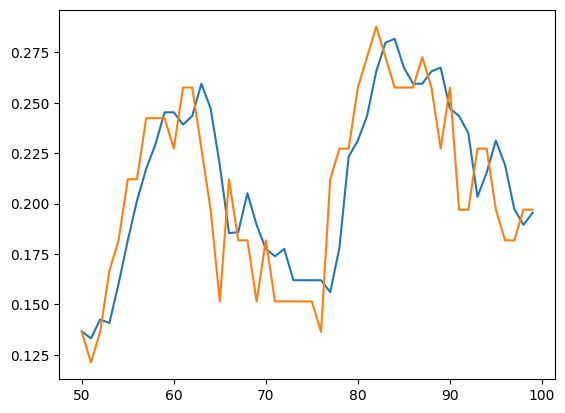

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

157/157 [==============================] - 0s 3ms/step


Val Predictions  Actuals
0            0.333313   0.3333
1            0.323017   0.3182
2            0.325012   0.3030
3            0.310541   0.2879
4            0.296129   0.2576
...               ...      ...
4995         0.568490   0.5303
4996         0.535100   0.5303
4997         0.526210   0.5303
4998         0.526210   0.5303
4999         0.526210   0.5303

[5000 rows x 2 columns]

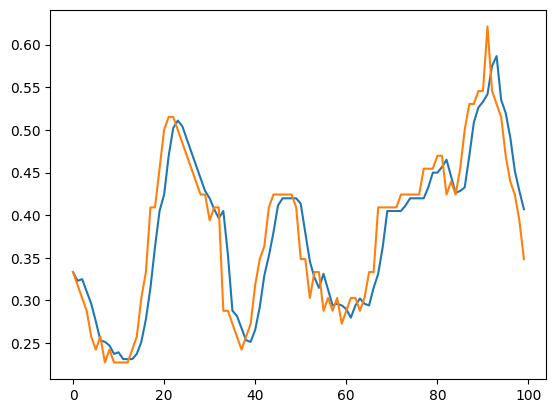

In [ ]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [ ]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

75/75 [==============================] - 0s 3ms/step


Test Predictions  Actuals
0             0.526210   0.5455
1             0.532825   0.5909
2             0.561580   0.6061
3             0.595178   0.6212
4             0.610935   0.6515
...                ...      ...
2372          0.281802   0.2576
2373          0.267535   0.2576
2374          0.259498   0.2576
2375          0.259498   0.2727
2376          0.265613   0.2727

[2377 rows x 2 columns]

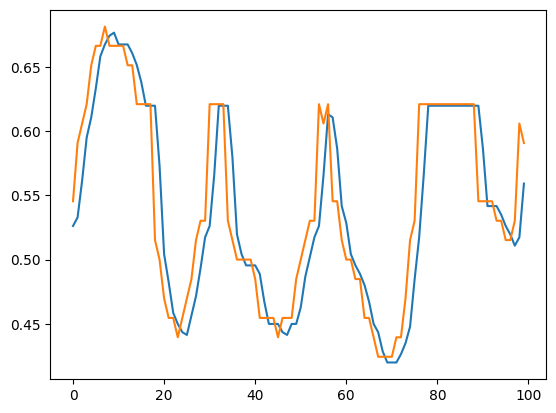

In [ ]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [ ]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

75/75 [==============================] - 0s 2ms/step


(      Predictions  Actuals
 0        0.526210   0.5455
 1        0.532825   0.5909
 2        0.561580   0.6061
 3        0.595178   0.6212
 4        0.610935   0.6515
 ...           ...      ...
 2372     0.281802   0.2576
 2373     0.267535   0.2576
 2374     0.259498   0.2576
 2375     0.259498   0.2727
 2376     0.265613   0.2727
 
 [2377 rows x 2 columns],
 0.000918164850796113)

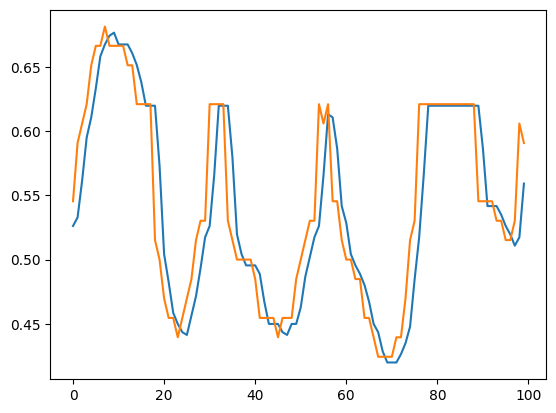

In [ ]:
plot_predictions1(model1, X_test1, y_test1)

In [ ]:
model2 = Sequential()
model2.add(InputLayer((2, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 1, 64)             192       
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
303/313 [============================>.] - ETA: 0s - loss: 0.0758 - root_mean_squared_error: 0.2753

313/313 [==============================] - 2s 4ms/step - loss: 0.0737 - root_mean_squared_error: 0.2715 - val_loss: 0.0110 - val_root_mean_squared_error: 0.1051
Epoch 2/10
302/313 [===========================>..] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.0720

313/313 [==============================] - 1s 3ms/step - loss: 0.0052 - root_mean_squared_error: 0.0718 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0589
Epoch 3/10
288/313 [==========================>...] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.0590

313/313 [==============================] - 1s 3ms/step - loss: 0.0034 - root_mean_squared_error: 0.0586 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0494
Epoch 4/10
301/313 [===========================>..] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0472

313/313 [==============================] - 1s 5ms/step - loss: 0.0022 - root_mean_squared_error: 0.0470 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0417
Epoch 5/10
279/313 [=========================>....] - ETA: 0s - loss: 0.0015 - root_mean_squared_error: 0.0384

313/313 [==============================] - 1s 3ms/step - loss: 0.0015 - root_mean_squared_error: 0.0382 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0360
Epoch 6/10
292/313 [==========================>...] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0336

313/313 [==============================] - 1s 3ms/step - loss: 0.0011 - root_mean_squared_error: 0.0334 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0335
Epoch 7/10
304/313 [============================>.] - ETA: 0s - loss: 0.0010 - root_mean_squared_error: 0.0317    

313/313 [==============================] - 1s 3ms/step - loss: 0.0010 - root_mean_squared_error: 0.0317 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0329
Epoch 8/10
295/313 [===========================>..] - ETA: 0s - loss: 9.8160e-04 - root_mean_squared_error: 0.0313

313/313 [==============================] - 1s 3ms/step - loss: 9.7545e-04 - root_mean_squared_error: 0.0312 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0327
Epoch 9/10
288/313 [==========================>...] - ETA: 0s - loss: 9.6422e-04 - root_mean_squared_error: 0.0311

313/313 [==============================] - 1s 5ms/step - loss: 9.6112e-04 - root_mean_squared_error: 0.0310 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0325
Epoch 10/10
284/313 [==========================>...] - ETA: 0s - loss: 9.4956e-04 - root_mean_squared_error: 0.0308

313/313 [==============================] - 1s 4ms/step - loss: 9.4743e-04 - root_mean_squared_error: 0.0308 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0322


In [ ]:
model3 = Sequential()
model3.add(InputLayer((2, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
307/313 [============================>.] - ETA: 0s - loss: 0.1066 - root_mean_squared_error: 0.3265

313/313 [==============================] - 7s 14ms/step - loss: 0.1050 - root_mean_squared_error: 0.3240 - val_loss: 0.0268 - val_root_mean_squared_error: 0.1638
Epoch 2/10
308/313 [============================>.] - ETA: 0s - loss: 0.0100 - root_mean_squared_error: 0.1000

313/313 [==============================] - 5s 15ms/step - loss: 0.0100 - root_mean_squared_error: 0.0998 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0802
Epoch 3/10
304/313 [============================>.] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.0732

313/313 [==============================] - 4s 12ms/step - loss: 0.0053 - root_mean_squared_error: 0.0729 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0550
Epoch 4/10
305/313 [============================>.] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.0488

313/313 [==============================] - 4s 14ms/step - loss: 0.0024 - root_mean_squared_error: 0.0486 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0380
Epoch 5/10
299/313 [===========================>..] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0340

313/313 [==============================] - 5s 15ms/step - loss: 0.0011 - root_mean_squared_error: 0.0339 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0325
Epoch 6/10
304/313 [============================>.] - ETA: 0s - loss: 9.3474e-04 - root_mean_squared_error: 0.0306

313/313 [==============================] - 4s 12ms/step - loss: 9.3845e-04 - root_mean_squared_error: 0.0306 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0320
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 9.2311e-04 - root_mean_squared_error: 0.0304 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0320
Epoch 8/10
313/313 [==============================] - 1s 3ms/step - loss: 9.1826e-04 - root_mean_squared_error: 0.0303 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0322
Epoch 9/10
307/313 [============================>.] - ETA: 0s - loss: 9.1464e-04 - root_mean_squared_error: 0.0302

313/313 [==============================] - 4s 14ms/step - loss: 9.1447e-04 - root_mean_squared_error: 0.0302 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0317
Epoch 10/10
302/313 [===========================>..] - ETA: 0s - loss: 8.9847e-04 - root_mean_squared_error: 0.0300

313/313 [==============================] - 8s 25ms/step - loss: 9.0410e-04 - root_mean_squared_error: 0.0301 - val_loss: 9.9493e-04 - val_root_mean_squared_error: 0.0315


In [ ]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

Temperature       Seconds
Date                                 
2011-01-01       0.2879  1.293840e+09
2011-01-01       0.2727  1.293840e+09
2011-01-01       0.2727  1.293840e+09
2011-01-01       0.2879  1.293840e+09
2011-01-01       0.2879  1.293840e+09
...                 ...           ...
2012-12-31       0.2576  1.356912e+09
2012-12-31       0.2576  1.356912e+09
2012-12-31       0.2576  1.356912e+09
2012-12-31       0.2727  1.356912e+09
2012-12-31       0.2727  1.356912e+09

[17379 rows x 2 columns]

In [ ]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

Temperature       Seconds       Day sin  Day cos  Year sin  \
Date                                                                     
2011-01-01       0.2879  1.293840e+09 -7.057106e-12      1.0  0.000989   
2011-01-01       0.2727  1.293840e+09 -7.057106e-12      1.0  0.000989   
2011-01-01       0.2727  1.293840e+09 -7.057106e-12      1.0  0.000989   
2011-01-01       0.2879  1.293840e+09 -7.057106e-12      1.0  0.000989   
2011-01-01       0.2879  1.293840e+09 -7.057106e-12      1.0  0.000989   

            Year cos  
Date                  
2011-01-01       1.0  
2011-01-01       1.0  
2011-01-01       1.0  
2011-01-01       1.0  
2011-01-01       1.0

In [ ]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

Temperature       Day sin  Day cos  Year sin  Year cos
Date                                                              
2011-01-01       0.2879 -7.057106e-12      1.0  0.000989       1.0
2011-01-01       0.2727 -7.057106e-12      1.0  0.000989       1.0
2011-01-01       0.2727 -7.057106e-12      1.0  0.000989       1.0
2011-01-01       0.2879 -7.057106e-12      1.0  0.000989       1.0
2011-01-01       0.2879 -7.057106e-12      1.0  0.000989       1.0

In [ ]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((17373, 6, 5), (17373,))

In [ ]:
X2_train, y2_train = X2[:10000], y2[:10000]
X2_val, y2_val = X2[10000:15000], y2[10000:15000]
X2_test, y2_test = X2[15000:], y2[15000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((10000, 6, 5), (10000,), (5000, 6, 5), (5000,), (2373, 6, 5), (2373,))

In [ ]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [ ]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 4.77032407e-01, -5.63400664e-12,  1.00000000e+00,
         -9.87726491e-01, -1.56193401e-01],
        [ 4.77032407e-01, -5.63400664e-12,  1.00000000e+00,
         -9.87726491e-01, -1.56193401e-01],
        [ 5.61918601e-01, -5.63400664e-12,  1.00000000e+00,
         -9.87726491e-01, -1.56193401e-01],
        [ 8.15460262e-01, -5.63400664e-12,  1.00000000e+00,
         -9.87726491e-01, -1.56193401e-01],
        [ 9.00346456e-01, -5.63400664e-12,  1.00000000e+00,
         -9.87726491e-01, -1.56193401e-01],
        [ 9.84674189e-01, -5.63400664e-12,  1.00000000e+00,
         -9.87726491e-01, -1.56193401e-01]],

       [[ 4.77032407e-01, -5.63400664e-12,  1.00000000e+00,
         -9.87726491e-01, -1.56193401e-01],
        [ 5.61918601e-01, -5.63400664e-12,  1.00000000e+00,
         -9.87726491e-01, -1.56193401e-01],
        [ 8.15460262e-01, -5.63400664e-12,  1.00000000e+00,
         -9.87726491e-01, -1.56193401e-01],
        [ 9.00346456e-01, -5.63400664e-12,  1.00000000e+00,
  

In [ ]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                17920     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
303/313 [============================>.] - ETA: 0s - loss: 0.1290 - root_mean_squared_error: 0.3592

313/313 [==============================] - 8s 17ms/step - loss: 0.1252 - root_mean_squared_error: 0.3539 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0806
Epoch 2/10
302/313 [===========================>..] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.0644

313/313 [==============================] - 5s 15ms/step - loss: 0.0041 - root_mean_squared_error: 0.0640 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0602
Epoch 3/10
301/313 [===========================>..] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0510

313/313 [==============================] - 6s 18ms/step - loss: 0.0026 - root_mean_squared_error: 0.0509 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0523
Epoch 4/10
303/313 [============================>.] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0470

313/313 [==============================] - 5s 15ms/step - loss: 0.0022 - root_mean_squared_error: 0.0468 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0499
Epoch 5/10
312/313 [============================>.] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0443

313/313 [==============================] - 8s 25ms/step - loss: 0.0020 - root_mean_squared_error: 0.0443 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0462
Epoch 6/10
312/313 [============================>.] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0418

313/313 [==============================] - 6s 21ms/step - loss: 0.0017 - root_mean_squared_error: 0.0418 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0433
Epoch 7/10
312/313 [============================>.] - ETA: 0s - loss: 0.0015 - root_mean_squared_error: 0.0393

313/313 [==============================] - 9s 29ms/step - loss: 0.0015 - root_mean_squared_error: 0.0393 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0401
Epoch 8/10
312/313 [============================>.] - ETA: 0s - loss: 0.0014 - root_mean_squared_error: 0.0369

313/313 [==============================] - 6s 18ms/step - loss: 0.0014 - root_mean_squared_error: 0.0369 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0370
Epoch 9/10
302/313 [===========================>..] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0346

313/313 [==============================] - 6s 20ms/step - loss: 0.0012 - root_mean_squared_error: 0.0346 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0346
Epoch 10/10
312/313 [============================>.] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0324

313/313 [==============================] - 7s 22ms/step - loss: 0.0011 - root_mean_squared_error: 0.0325 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0318


75/75 [==============================] - 0s 2ms/step


(      Predictions  Actuals
 0        0.598541   0.6515
 1        0.618994   0.6667
 2        0.633927   0.6667
 3        0.639365   0.6818
 4        0.647879   0.6667
 ...           ...      ...
 2368     0.281539   0.2576
 2369     0.274010   0.2576
 2370     0.269644   0.2576
 2371     0.267065   0.2727
 2372     0.271929   0.2727
 
 [2373 rows x 2 columns],
 0.0010870988582569806)

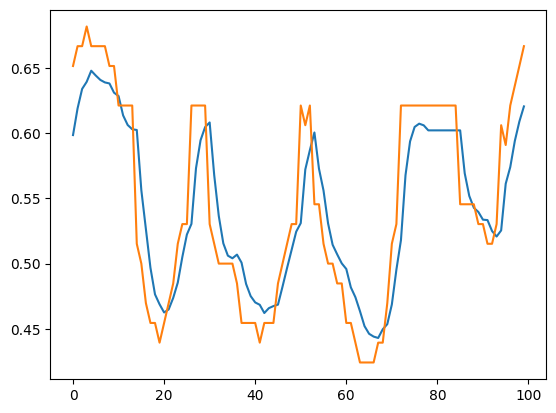

In [ ]:
plot_predictions1(model4, X2_test, y2_test)

In [ ]:
p_temp_df = pd.concat([df['users'], temp_df], axis=1)
p_temp_df.head()

users  Temperature       Day sin  Day cos  Year sin  Year cos
Date                                                                     
2011-01-01   16.0       0.2879 -7.057106e-12      1.0  0.000989       1.0
2011-01-01   40.0       0.2727 -7.057106e-12      1.0  0.000989       1.0
2011-01-01   32.0       0.2727 -7.057106e-12      1.0  0.000989       1.0
2011-01-01   13.0       0.2879 -7.057106e-12      1.0  0.000989       1.0
2011-01-01    1.0       0.2879 -7.057106e-12      1.0  0.000989       1.0

In [ ]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((17372, 7, 6), (17372, 2))

In [ ]:
X3_train, y3_train = X3[:10000], y3[:10000]
X3_val, y3_val = X3[10000:15000], y3[10000:15000]
X3_test, y3_test = X3[15000:], y3[15000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((10000, 7, 6), (10000, 2), (5000, 7, 6), (5000, 2), (2372, 7, 6), (2372, 2))

In [ ]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [ ]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [ ]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[ 4.10200193,  1.23877467],
       [ 4.24506   ,  1.23877467],
       [ 3.84600328,  1.32310307],
       ...,
       [-0.4005626 , -1.0459107 ],
       [-0.61891439, -0.9615823 ],
       [-0.70926685, -0.9615823 ]])

In [ ]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                18176     
                                                                 
 dense_12 (Dense)            (None, 8)                 520       
                                                                 
 dense_13 (Dense)            (None, 2)                 18        
                                                                 
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
313/313 [==============================] - ETA: 0s - loss: 0.6600 - root_mean_squared_error: 0.8124

313/313 [==============================] - 8s 16ms/step - loss: 0.6600 - root_mean_squared_error: 0.8124 - val_loss: 1.3627 - val_root_mean_squared_error: 1.1673
Epoch 2/10
299/313 [===========================>..] - ETA: 0s - loss: 0.3599 - root_mean_squared_error: 0.5999

313/313 [==============================] - 6s 18ms/step - loss: 0.3583 - root_mean_squared_error: 0.5986 - val_loss: 0.9680 - val_root_mean_squared_error: 0.9838
Epoch 3/10
310/313 [============================>.] - ETA: 0s - loss: 0.2454 - root_mean_squared_error: 0.4954

313/313 [==============================] - 7s 21ms/step - loss: 0.2456 - root_mean_squared_error: 0.4955 - val_loss: 0.6781 - val_root_mean_squared_error: 0.8235
Epoch 4/10
311/313 [============================>.] - ETA: 0s - loss: 0.1955 - root_mean_squared_error: 0.4422

313/313 [==============================] - 7s 21ms/step - loss: 0.1956 - root_mean_squared_error: 0.4423 - val_loss: 0.5957 - val_root_mean_squared_error: 0.7718
Epoch 5/10
309/313 [============================>.] - ETA: 0s - loss: 0.1700 - root_mean_squared_error: 0.4123

313/313 [==============================] - 8s 27ms/step - loss: 0.1710 - root_mean_squared_error: 0.4135 - val_loss: 0.5186 - val_root_mean_squared_error: 0.7201
Epoch 6/10
312/313 [============================>.] - ETA: 0s - loss: 0.1512 - root_mean_squared_error: 0.3889

313/313 [==============================] - 9s 29ms/step - loss: 0.1512 - root_mean_squared_error: 0.3889 - val_loss: 0.4795 - val_root_mean_squared_error: 0.6925
Epoch 7/10
313/313 [==============================] - ETA: 0s - loss: 0.1360 - root_mean_squared_error: 0.3688

313/313 [==============================] - 6s 20ms/step - loss: 0.1360 - root_mean_squared_error: 0.3688 - val_loss: 0.4446 - val_root_mean_squared_error: 0.6668
Epoch 8/10
307/313 [============================>.] - ETA: 0s - loss: 0.1230 - root_mean_squared_error: 0.3507

313/313 [==============================] - 5s 16ms/step - loss: 0.1236 - root_mean_squared_error: 0.3516 - val_loss: 0.4073 - val_root_mean_squared_error: 0.6382
Epoch 9/10
312/313 [============================>.] - ETA: 0s - loss: 0.1141 - root_mean_squared_error: 0.3379

313/313 [==============================] - 9s 29ms/step - loss: 0.1140 - root_mean_squared_error: 0.3377 - val_loss: 0.3964 - val_root_mean_squared_error: 0.6296
Epoch 10/10
308/313 [============================>.] - ETA: 0s - loss: 0.1067 - root_mean_squared_error: 0.3266

313/313 [==============================] - 8s 26ms/step - loss: 0.1064 - root_mean_squared_error: 0.3262 - val_loss: 0.3904 - val_root_mean_squared_error: 0.6249


In [ ]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'user Predictions': p_preds,
                          'user Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['user Predictions'][start:end])
  plt.plot(df['user Actuals'][start:end])
  plt.legend(['Temperature Predictions','Temperature Actuals','user Predictions','user Actuals'])
  return df[start:end]

75/75 [==============================] - 0s 2ms/step


Temperature Predictions  Temperature Actuals  user Predictions  \
0                  1.014086             1.238775          2.341198   
1                  0.895593             1.238775          2.311946   
2                  0.811972             1.323103          2.303195   
3                  0.792171             1.238775          2.157353   
4                  0.687367             1.238775          2.389030   
..                      ...                  ...               ...   
95                 0.754602             0.984673          0.135363   
96                 0.894378             1.069559          0.593536   
97                 0.959959             1.153888          1.369864   
98                 0.995051             1.238775          1.408828   
99                 1.086217             1.238775          0.846013   

    user Actuals  
0       4.102002  
1       4.245060  
2       3.846003  
3       4.568823  
4       4.041767  
..           ...  
95      0.630961  
96      1.301076  
97      1.481780  
98      1.007430  
99      1.180606  

[100 rows x 4 columns]

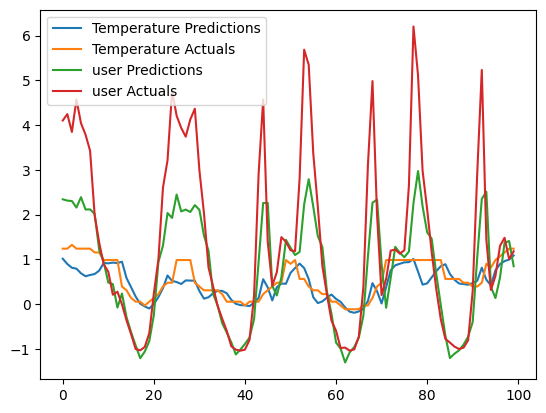

In [ ]:
plot_predictions2(model5, X3_test, y3_test)

In [ ]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

In [ ]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
  p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'user Predictions': p_preds,
                          'user Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['user Predictions'][start:end])
  plt.plot(df['user Actuals'][start:end])
  plt.legend(['Temperature Predictions','Temperature Actuals','user Predictions','user Actuals'],loc='upper right', bbox_to_anchor=(1.5, 1.05),
          ncol=2, fancybox=True, shadow=True)

  return df[start:end]

75/75 [==============================] - 0s 2ms/step


Temperature Predictions  Temperature Actuals  user Predictions  \
0                  0.626467               0.6667        454.142029   
1                  0.605249               0.6667        450.256958   
2                  0.590276               0.6818        449.094666   
3                  0.586730               0.6667        429.725037   
4                  0.567964               0.6667        460.494751   
..                      ...                  ...               ...   
95                 0.580003               0.6212        161.178009   
96                 0.605032               0.6364        222.029358   
97                 0.616775               0.6515        325.136047   
98                 0.623058               0.6667        330.310913   
99                 0.639383               0.6667        255.561676   

    user Actuals  
0          688.0  
1          707.0  
2          654.0  
3          750.0  
4          680.0  
..           ...  
95         227.0  
96         316.0  
97         340.0  
98         277.0  
99         300.0  

[100 rows x 4 columns]

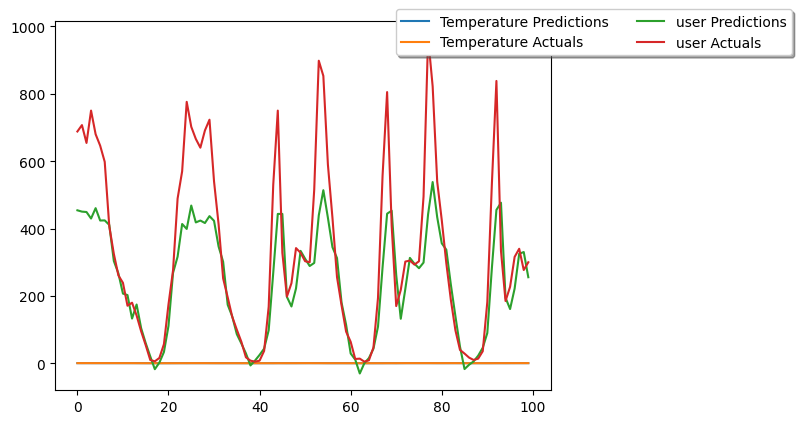

In [ ]:
post_processed_df = plot_predictions2(model5, X3_test, y3_test)
post_processed_df

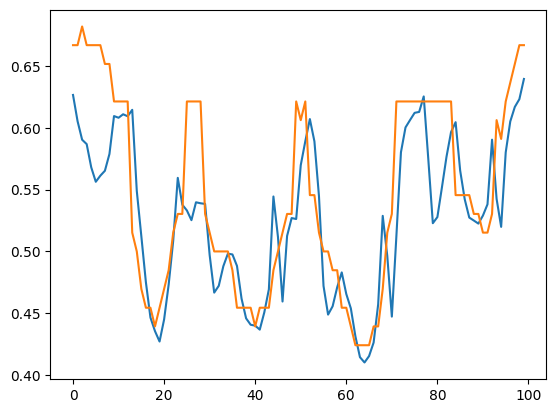

In [ ]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])

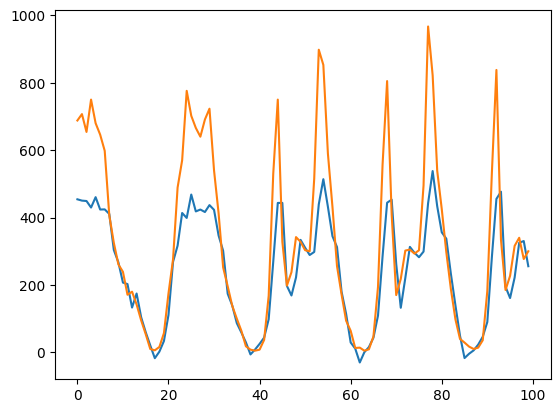

In [ ]:
plt.plot(post_processed_df['user Predictions'][start:end])
plt.plot(post_processed_df['user Actuals'][start:end])

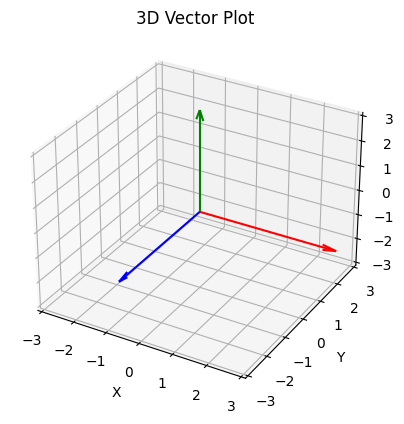

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

v1 = np.array([4, 0, 0])
v2 = np.array([0, -4, 0])
v3 = np.array([0, 0, 4])

#VECTOR 1
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='r', arrow_length_ratio=0.1)
#VECTOR 2
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='b', arrow_length_ratio=0.1)
#VECTOR 3
ax.quiver(0, 0, 0, v3[0], v3[1], v3[2], color='g', arrow_length_ratio=0.1)

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Vector Plot')

plt.show()

## Closed-form Continuous-time Neural Models


In [1]:
pip install cfc-model


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.0/23.0 MB 7.0 MB/s eta 0:00:00


In [2]:
from cfc_model.dense_models import SequentialModel
import numpy as np
X = np.array([[1, 1, 1, 0], [1, 1, 0, 1], [1, 0, 0, 1], [1, 1, 0, 0],
              [1, 0, 1, 0], [1, 1, 0, 1], [1, 0, 0, 1], [1, 0, 1, 0]])
y = np.array([0, 0, 1, 1, 1, 0, 1, 1])
model = SequentialModel()
model.fit(X, y)
y_pred = model.predict([1, 1, 0, 1]) # y_pred equals 0

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 pixel (InputLayer)             [(None, 4, 1)]       0           []                               
                                                                                                  
 time (InputLayer)              [(None, 4, 1)]       0           []                               
                                                                                                  
 mask (InputLayer)              [(None, 4)]          0           []                               
                                                                                                  
 rnn (RNN)                      (None, 64)           41472       ['pixel[0][0]',                  
                                                                  'time[0][0]',               

In [3]:
# Runs an LTC with a semi-implicit ODE solver instead of a CfC
config = {"use_ltc": True}
model.fit(X, y, config=config)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 pixel (InputLayer)             [(None, 4, 1)]       0           []                               
                                                                                                  
 time (InputLayer)              [(None, 4, 1)]       0           []                               
                                                                                                  
 mask (InputLayer)              [(None, 4)]          0           []                               
                                                                                                  
 rnn_1 (RNN)                    (None, 64)           16962       ['pixel[0][0]',                  
                                                                  'time[0][0]',             